# Census Income Project


### Project Description


###### This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over year

### Description of fnlwgt (final weight)


###### The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:



###### A single cell estimate of the population 16+ for each state.
###### Controls for Hispanic Origin by age and sex.
###### Controls by Race, age and sex.


###### We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')


### Custom functions


In [2]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')


## Load the dataset


In [3]:
# Retrive the dataset using the raw address

df = pd.read_csv("census_income.csv")


## EDA Exploratory Data Analysis


###  First view


In [4]:
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
5476,19,State-gov,156294,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,25,United-States,<=50K
5477,51,Private,254211,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,20,United-States,>50K
5478,41,Private,151504,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,>50K
5479,61,Private,85548,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,18,United-States,>50K
5480,19,Self-emp-not-inc,30800,10th,6,Married-spouse-absent,Adm-clerical,Unmarried,Amer-Indian-Eskimo,Female,0,0,40,United-States,<=50K


In [6]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset:\n {df.columns.to_list()}")


The rows and columns in the dataset: (5481, 15)

The column headers in the dataset:
 ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income']


The dataset contains 32560 rows and 15 columns. Out of which 1 is the target variable "Income" and the remaining 14 are independent variables described in Project description section.



In [7]:
# checking the types of columns
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             5481 non-null   int64 
 1   Workclass       5481 non-null   object
 2   Fnlwgt          5481 non-null   int64 
 3   Education       5481 non-null   object
 4   Education_num   5481 non-null   int64 
 5   Marital_status  5481 non-null   object
 6   Occupation      5481 non-null   object
 7   Relationship    5481 non-null   object
 8   Race            5481 non-null   object
 9   Sex             5481 non-null   object
 10  Capital_gain    5481 non-null   int64 
 11  Capital_loss    5481 non-null   int64 
 12  Hours_per_week  5481 non-null   int64 
 13  Native_country  5481 non-null   object
 14  Income          5481 non-null   object
dtypes: int64(6), object(9)
memory usage: 642.4+ KB
None


There are two types of data (int64 and object ) present in the dataset.



Object(string): Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country, and Income
int64: Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week
The dataset NO presents null values.

## Missing values


In [8]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val


,Null values,% of missing
Age,0,0.0
Workclass,0,0.0
Fnlwgt,0,0.0
Education,0,0.0
Education_num,0,0.0
Marital_status,0,0.0
Occupation,0,0.0
Relationship,0,0.0
Race,0,0.0
Sex,0,0.0


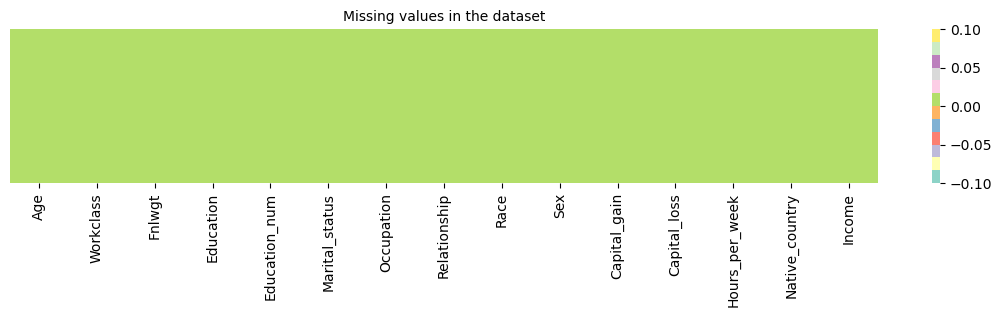

In [9]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);


At first view, the dataset does not have null values.



##  Features Analysis


####  Unique values


Now, we are going to review the unique values of each column in the dataset in order to understand the data and the features.



In [10]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

info_df


,No. of Unique values,type
Age,69,int64
Workclass,9,object
Fnlwgt,5004,int64
Education,16,object
Education_num,16,int64
Marital_status,7,object
Occupation,15,object
Relationship,6,object
Race,5,object
Sex,2,object


In [11]:
# Checking for columns with one unique value or have the same unique values as rows has the dataset
info_df[(info_df['No. of Unique values'] == 1) | (info_df['No. of Unique values'] == df.shape[0]) ]


,No. of Unique values,type


About the number of unique values in the datasets:



The dataset contains the following categorical variables: Workclass(9), Education(16), Marital_status(7), Occupation(15), Relationship(6), Race(5), Sex(2), Native_country(42), Income(2) with its respective unique values.

The numerical columns in the dataset are: Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, and Hours_per_week.

However, the numerical columns but Fnlwgt are discrete and have a small number of unique values. They could be analyzed as categorical during EDA.



### Income unique values


In [12]:
# Checking the target variable
df['Income'].value_counts().to_frame()


,Income
<=50K,4154
>50K,1327


The target variable has two unique values: <=50K or >50K. The dataset is imbalance.



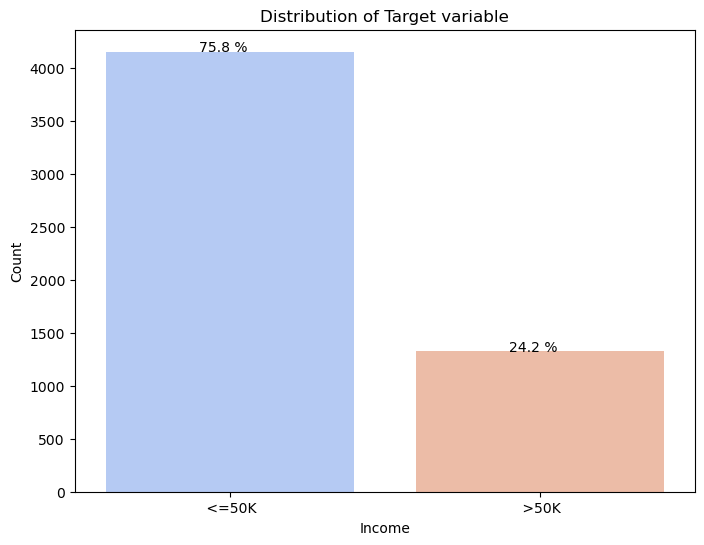

In [13]:
# Visualize the distribution of Income
col = 'Income'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=col, palette='coolwarm')
show_percentage(ax, len(df))
plt.title('Distribution of Target variable')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()


And we can observe the dataset is imbalanced. There are significantly more records(75.9%) for "<=50K" compared to 24.1% for ">50K". We will rectify it by using the oversampling method in the later part.



### Categorical variables unique values


We are going to separate the categorical columns from the numerical columns again because we eliminated some columns from the dataset.



In [14]:
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")


Categorical Columns:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Numerical Columns:
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']



In [15]:
# Checking the value counts of the categorical independent variables
for i, col in enumerate(categorical_col[1:]):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")


1.Education:
 HS-grad         1769
 Some-college    1235
 Bachelors        910
 Masters          280
 Assoc-voc        242
 11th             212
 Assoc-acdm       177
 10th             155
 7th-8th          111
 Prof-school       95
 9th               90
 Doctorate         62
 12th              62
 5th-6th           50
 1st-4th           24
 Preschool          7
Name: Education, dtype: int64

2.Marital_status:
 Married-civ-spouse       2497
 Never-married            1817
 Divorced                  747
 Widowed                   173
 Separated                 167
 Married-spouse-absent      75
 Married-AF-spouse           5
Name: Marital_status, dtype: int64

3.Occupation:
 Prof-specialty       684
 Craft-repair         678
 Exec-managerial      676
 Sales                651
 Adm-clerical         628
 Other-service        541
 ?                    358
 Machine-op-inspct    341
 Transport-moving     272
 Handlers-cleaners    220
 Farming-fishing      160
 Tech-support         148
 Protec

These are the unique values for the categorical independent variables. In the Occupation and Native_country columns are observations classified as "?" which means that these values are unknown or missing.



###  Numerical variables unique values


In [16]:
# Checking the value counts of the numerical independent variables
for i, col in enumerate(numerical_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")


1.Age:
31    172
25    156
35    154
23    151
34    149
     ... 
79      3
78      2
88      1
82      1
83      1
Name: Age, Length: 69, dtype: int64

2.Fnlwgt:
123983    5
163003    4
117963    4
116632    4
94235     4
         ..
121618    1
165054    1
31603     1
62463     1
30800     1
Name: Fnlwgt, Length: 5004, dtype: int64

3.Education_num:
9     1769
10    1235
13     910
14     280
11     242
7      212
12     177
6      155
4      111
15      95
5       90
16      62
8       62
3       50
2       24
1        7
Name: Education_num, dtype: int64

4.Capital_gain:
0        5026
15024      68
7688       52
7298       40
99999      25
         ... 
2463        1
2228        1
2961        1
1471        1
3418        1
Name: Capital_gain, Length: 84, dtype: int64

5.Capital_loss:
0       5202
1902      43
1977      33
1887      25
2415      11
1848       9
1740       9
1485       9
1590       9
1672       8
1741       7
1719       6
1564       6
1876       6
1762       6
1628   

In [17]:
print(f"% of zeros in Capital_gain column is {df.Capital_gain.value_counts(normalize=True)[0]*100:.2f}%")
print(f"% of zeros in Capital_loss column is {df.Capital_loss.value_counts(normalize=True)[0]*100:.2f}%")


% of zeros in Capital_gain column is 91.70%
% of zeros in Capital_loss column is 94.91%


These are the unique values for the numerical independent variables. The Capital_gain and Capital_loss columns have a large number of zeros, 91.67% and 95.33% respectively.



### Summary statistics of the numerical variables and non-numerical variables¶


In [18]:
# Summary statistics of numerical columns
stats = df.describe()

stats


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,5481.000000,5.481000e+03,5481.000000,5481.000000,5481.000000,5481.000000
mean,38.580551,1.904883e+05,10.077176,1041.730159,93.890348,40.460500
std,13.671623,1.065866e+05,2.541565,7159.886951,412.022101,12.139064
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.794230e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.408170e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.184622e+06,16.000000,99999.000000,3004.000000,99.000000


In [19]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)


Fnlwgt            11065.290093
Capital_gain       1041.730159
Capital_loss         93.890348
Age                   1.580551
Hours_per_week        0.460500
Education_num         0.077176
dtype: float64

In [20]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)


Fnlwgt            780960.439672
Capital_gain       84637.495939
Capital_loss        2086.065450
Hours_per_week        34.261372
Age                   24.076204
Education_num          0.839694
dtype: float64

### Observations:



The summary of the dataset shows there are no negative/invalid values present.

The counts are the same as the total of rows in all columns which means there are no missing values. However, almost all the observations of Capital_gain and Capital_loss columns are zeros.

The dependent variable Income is categorical with two unique values <=50K/>50K.

The mean value is larger than the median(50%) in columns Fnlwgt, Capital_gain, and Capital_loss, which means the data could be skewed to the right in these columns.

The dataset could present outliers in the columns Fnlwgt, Capital_gain, and Capital_loss, however in the univariate analysis of each feature we will verify it.

The features are not on the same scale. Features should be on the same scale for algorithms such as logistic regression or SVM to converge smoothly.



In [21]:
# Look at the non numeric columns
df.describe(exclude=[np.number])


,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,5481,5481,5481,5481,5481,5481,5481,5481,5481
unique,9,16,7,15,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,3761,1769,2497,684,2192,4666,3692,4895,4154


Here we can see the number of unique values for each categorical variable as well as the most frequent value.



###  Clean the data


Duplicates


In [22]:
# Searching for duplicated values
print(f"There are {df.duplicated().sum()} duplicates in the dataset.")


There are 2 duplicates in the dataset.


The dataset have duplicate values.



In [23]:
# Drop duplicated rows 
df.drop_duplicates(inplace=True)

# checking the new dimension of the dataset
print(f"After dropping duplicates, the rows and columns in the dataset: {df.shape}")
print(f"Now, There are {df.duplicated().sum()} duplicates in the dataset.")


After dropping duplicates, the rows and columns in the dataset: (5479, 15)
Now, There are 0 duplicates in the dataset.


 ###  Preprocessing Occupation


For the Education feature, we will take some considerations in order to sharpen our analysis. We will combine some categories into more representative ones, as follows:



In [24]:
# Define the mapping for combining categories
category_mapping = {
    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate',
    '11th': 'Below High School',
    '10th': 'Below High School',
    '7th-8th': 'Below High School',
    '9th': 'Below High School',
    '12th': 'Below High School',
    '5th-6th': 'Below High School',
    '1st-4th': 'Below High School',
    'Preschool': 'Below High School'
}
col = 'Education'

# Eliminating extra spaces 
df[col] = df[col].str.strip()

# In column Occupation_bk will reserve the original values
df['Education_bk'] = df[col]

# Assing the combined categories
df[col] = df[col].replace(category_mapping)
df[col].unique()


array(['Bachelors', 'HS-grad', 'Below High School', 'Masters',
       'Some-college', 'Associate', 'Doctorate', 'Prof-school'],
      dtype=object)

Now the Education variable has 8 more general categories.



###  Setting the order in the categories


In [25]:
# Define the order for the category Education with original values.
col = 'Education_bk'
order_cat =  ['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college','HS-grad', 
              '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
print(f"Categories for {col}:")
display(df[col].dtype)


Categories for Education_bk:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc',
                  'Assoc-acdm', 'Prof-school', 'Some-college', 'HS-grad',
                  '11th', '10th', '7th-8th', '9th', '12th', '5th-6th',
                  '1st-4th', 'Preschool'],
, ordered=True)

In [26]:
# Define the order for the categorical features.

categories_order = {}

for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:")
    
    # Eliminating extra spaces 
    df[col] = df[col].str.strip()
    # Defining ? == Unknown
    df[col] = df[col].str.replace('?', 'Unknown') # Later these will considering missing values

    # Transform to ordered categories
    if col == 'Education':
        order_cat = ['Doctorate', 'Masters', 'Bachelors', 'Associate', 'Prof-school',
                     'Some-college','HS-grad', 'Below High School']
    else:   
        order_cat = df[col].value_counts().index.to_list()
    
    categories_order[col] = order_cat
    df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
    display(df[col].dtype)


1.Workclass:


CategoricalDtype(categories=['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown',
                  'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay',
                  'Never-worked'],
, ordered=True)

2.Education:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Associate',
                  'Prof-school', 'Some-college', 'HS-grad',
                  'Below High School'],
, ordered=True)

3.Marital_status:


CategoricalDtype(categories=['Married-civ-spouse', 'Never-married', 'Divorced', 'Widowed',
                  'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
, ordered=True)

4.Occupation:


CategoricalDtype(categories=['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Sales',
                  'Adm-clerical', 'Other-service', 'Unknown',
                  'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners',
                  'Farming-fishing', 'Tech-support', 'Protective-serv',
                  'Priv-house-serv', 'Armed-Forces'],
, ordered=True)

5.Relationship:


CategoricalDtype(categories=['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
                  'Other-relative'],
, ordered=True)

6.Race:


CategoricalDtype(categories=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
                  'Other'],
, ordered=True)

7.Sex:


CategoricalDtype(categories=['Male', 'Female'], ordered=True)

8.Native_country:


CategoricalDtype(categories=['United-States', 'Mexico', 'Unknown', 'Canada', 'Germany',
                  'Philippines', 'El-Salvador', 'Puerto-Rico', 'Cuba', 'China',
                  'Jamaica', 'England', 'Dominican-Republic', 'Poland',
                  'Italy', 'Iran', 'Vietnam', 'Taiwan', 'India', 'South',
                  'Japan', 'Guatemala', 'Portugal', 'Columbia', 'Greece',
                  'Haiti', 'Nicaragua', 'Trinadad&Tobago', 'Ireland',
                  'Ecuador', 'Cambodia', 'France', 'Peru',
                  'Outlying-US(Guam-USVI-etc)', 'Honduras', 'Yugoslavia',
                  'Scotland', 'Thailand', 'Laos', 'Hong'],
, ordered=True)

##  Data Visualization


### Univariate Analysis


Target feature


In [27]:
# Distribution of Income
df['Income'].value_counts().to_frame()


,Income
<=50K,4152
>50K,1327


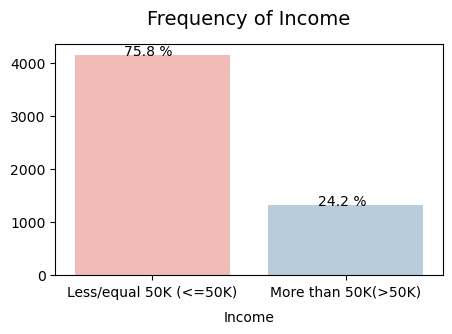

In [28]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Income
col = 'Income'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['Less/equal 50K (<=50K)', 'More than 50K(>50K)'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05);


24697 (75.9%) records as "<=50K" and 7839 (24.1%) records as ">50K" of the total dataset. The target variable is imbalanced.



### Categorical columns


In [29]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}")


1.Workclass
2.Education
3.Marital_status
4.Occupation
5.Relationship
6.Race
7.Sex
8.Native_country


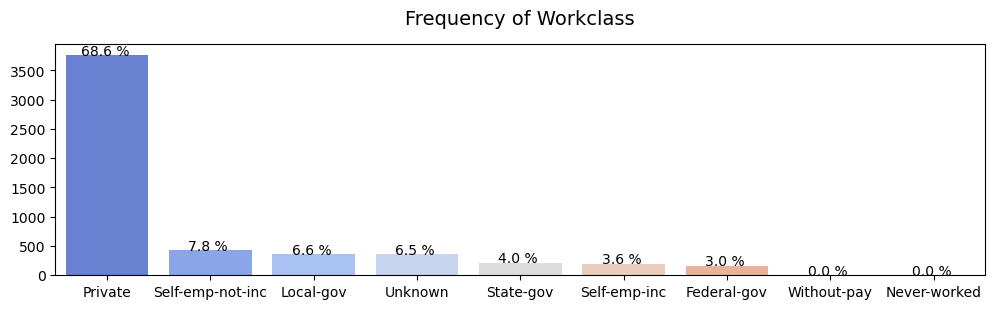

In [30]:
# Visualize the frequency of Workclass(1)
col = 'Workclass'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='coolwarm', order=df_counts.index.categories.to_list())
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);


In [31]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T


,Private,Self-emp-not-inc,Local-gov,Unknown,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
Workclass,3759,425,359,357,217,198,162,1,1


69.7% are private workclass, and the rest of the categories have a presence of less than 8%. For consolidation in the analysis, would be interesting to group all self-employees, all government employees, and those with no income(Without-pay + Never-worked).



Text(0.5, 1.05, 'Frequency of Education')

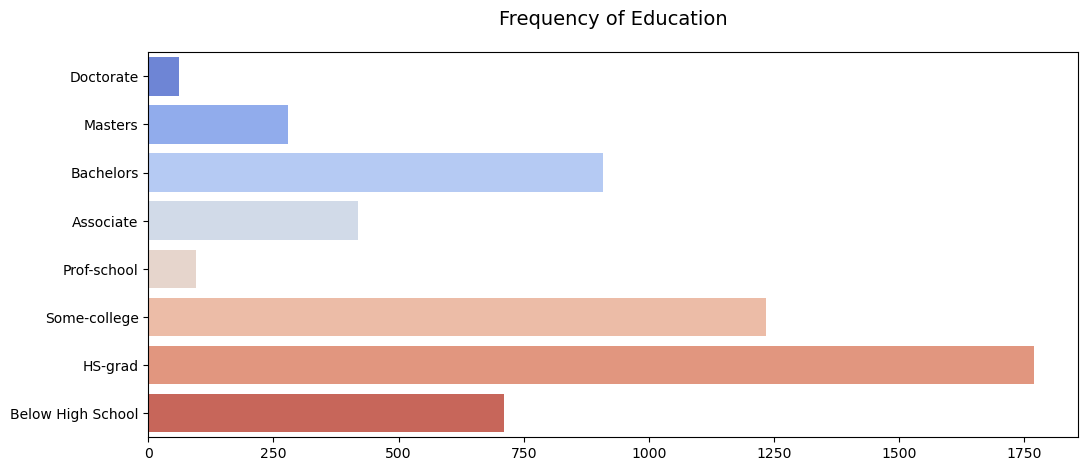

In [32]:
# Visualize the frequency of Education(2)
col = 'Education'
plt.figure(figsize=(12, 5))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(y=df_sorted.index, x=df_sorted[col], palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)


In [33]:
# Display the counts and % of each category
df_sorted['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
df_sorted.T


,HS-grad,Some-college,Bachelors,Below High School,Associate,Masters,Prof-school,Doctorate
Education,1769.00,1234.00,909.00,711.00,419.00,280.00,95.00,62.00
%,32.29,22.52,16.59,12.98,7.65,5.11,1.73,1.13


32.25% have a High school graduate level of education, followed by Some college with 22.38%, Bachelor with 16.45%, Below High School with 13.06%, Associate with 7.53%, and Master with 5.29%. The rest of the observations have a representation of less than 5%.



Text(0.5, 1.05, 'Frequency of Marital_status')

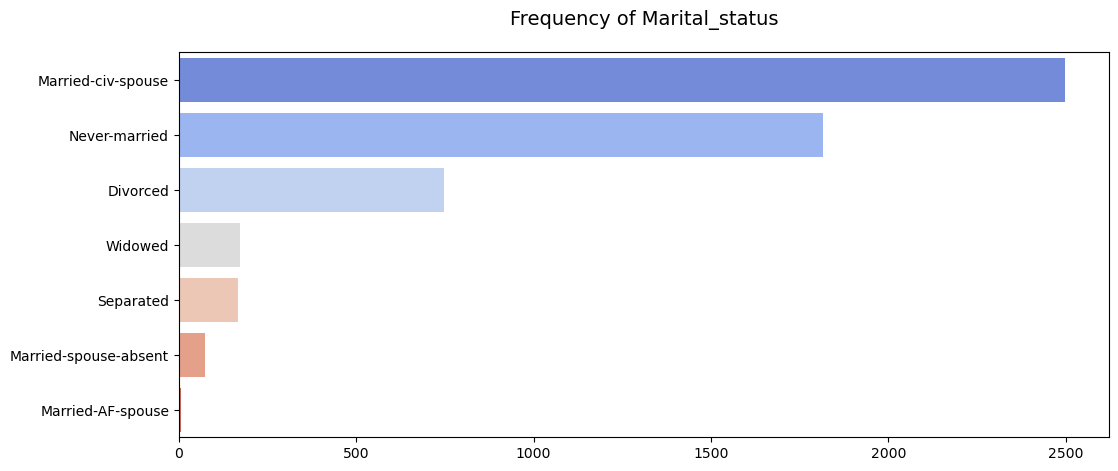

In [34]:
# Visualize the frequency of Marital_status(3)
col = 'Marital_status'
plt.figure(figsize=(12, 5))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(y=df_sorted.index, x=df_sorted[col], palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)


In [35]:
# Display the counts and % of each category
df_sorted['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
df_sorted.T


,Married-civ-spouse,Never-married,Divorced,Widowed,Separated,Married-spouse-absent,Married-AF-spouse
Marital_status,2497.00,1815.00,747.00,173.00,167.00,75.00,5.00
%,45.57,33.13,13.63,3.16,3.05,1.37,0.09


46.01% are married to a civilian spouse, 32.78% have never been married, 13.65% are divorced, 6.20% are separated or widowed, 1.28% are married but the spouse is absent, and less than 1% are married with a spouse in the Armed Forces.



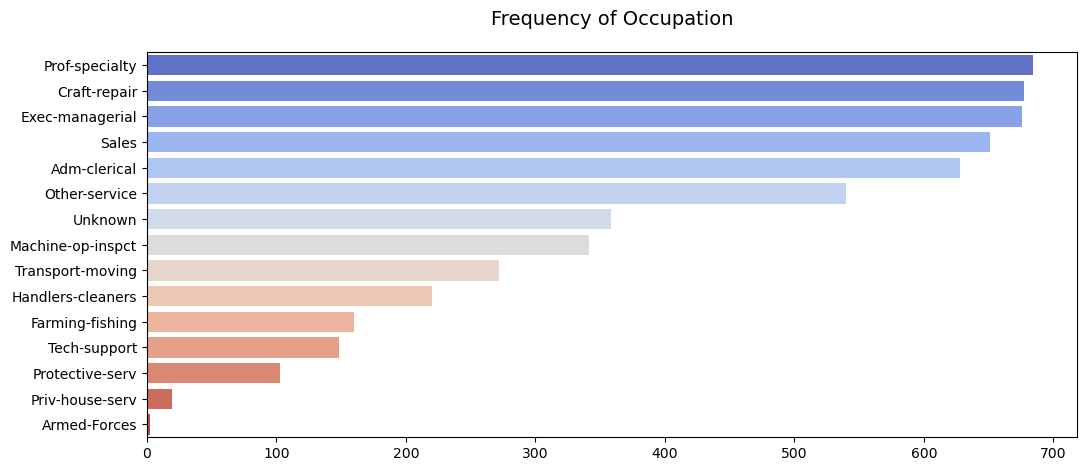

In [36]:
# Visualize the frequency of Occupation(4)
col = 'Occupation'
plt.figure(figsize=(12, 5))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(y=df_sorted.index, x=df_sorted[col], palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()


In [37]:
# Display the counts and % of each category
df_sorted['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
df_sorted.T


,Prof-specialty,Craft-repair,Exec-managerial,Sales,Adm-clerical,Other-service,Unknown,Machine-op-inspct,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
Occupation,684.00,677.00,676.00,651.00,628.00,540.00,358.00,341.00,272.00,220.00,160.00,148.0,103.00,19.00,2.00
%,12.48,12.36,12.34,11.88,11.46,9.86,6.53,6.22,4.96,4.02,2.92,2.7,1.88,0.35,0.04


The top 5 occupations are as follows in order:



Professional specialist (12.71%)
Craft repair (12.58%)
Executive Manager (12.49%)
Administrative Clerks(11.58%)
Sales (11.22%)
There is a 5.66% unknown occupation.



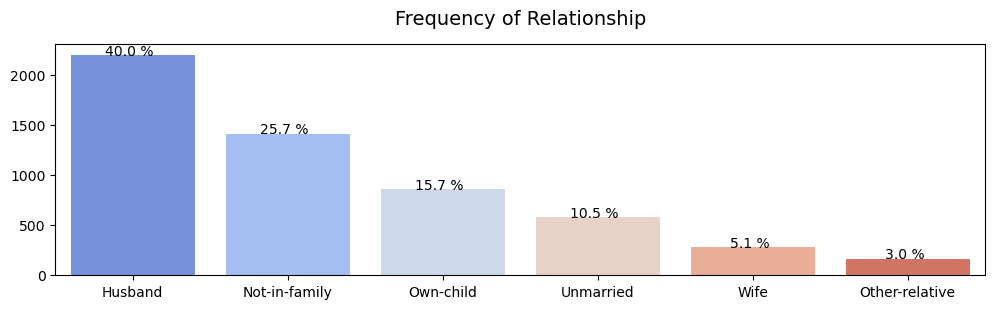

In [38]:
# Visualize the frequency of Relationship(5)
col = 'Relationship'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()


In [39]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
Relationship,2192,1409,860,577,277,164


40.5% are a Husband, 25.5% not-in-family, 15.6% own-child, 10.6% unmarried, 4.8% wife, and 3% other-relative.



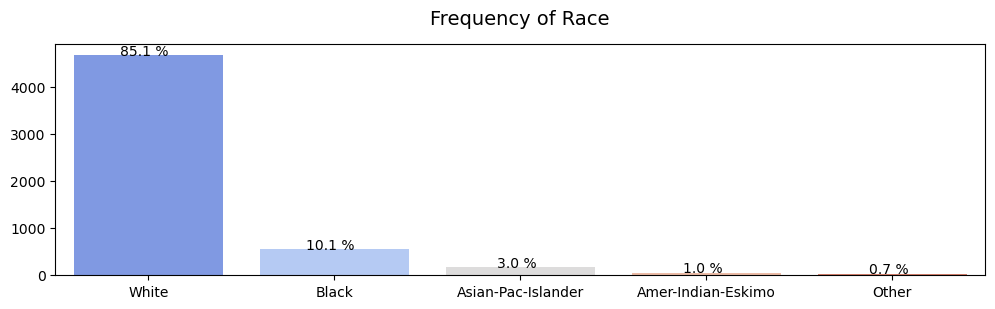

In [40]:
# Visualize the frequency of Race(6)
col = 'Race'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()


In [41]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
Race,4665,556,165,57,36


En cuanto a raza, 85.4% of the observations correspond to white, followed by 9.6% black race, 3.2% Asian-Pac-Islander, 1% Amer-Indian-Eskimo, and 0.8% other.



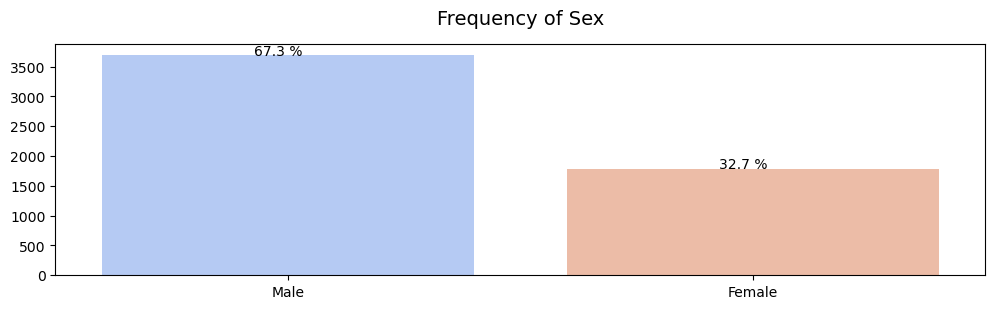

In [42]:
# Visualize the frequency of Sex(7)
col = 'Sex'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()


In [43]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T


,Male,Female
Sex,3690,1789


66.9% of observations correspond to Male, and the rest 33.1% to female.



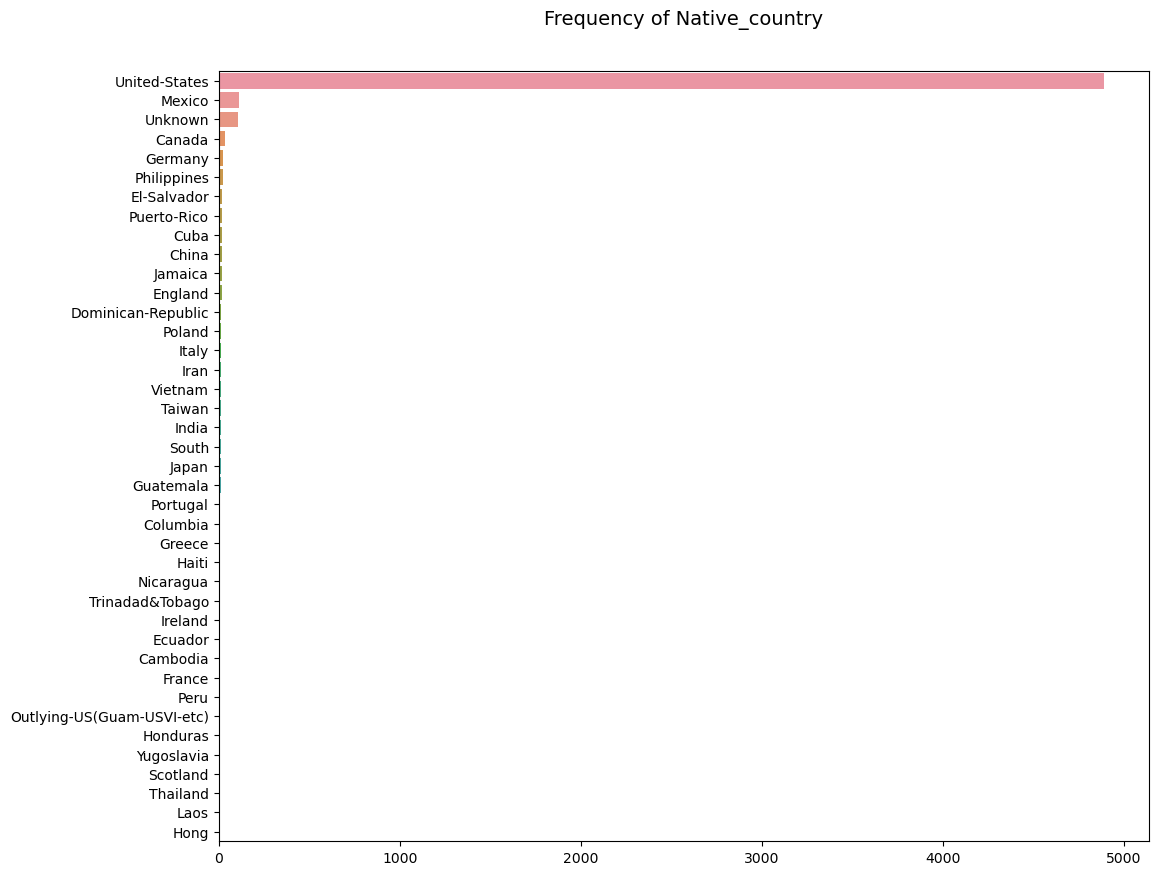

In [44]:
# Visualize the frequency of Native_country(8)
col = 'Native_country'
plt.figure(figsize=(12, 10))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(y=df_sorted.index, x=df_sorted[col])

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()


In [45]:
# Display the counts and % of each category
df_sorted['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
df_sorted.T


,United-States,Mexico,Unknown,Canada,Germany,Philippines,El-Salvador,Puerto-Rico,Cuba,England,...,Cambodia,Outlying-US(Guam-USVI-etc),Honduras,France,Peru,Yugoslavia,Scotland,Thailand,Laos,Hong
Native_country,4894.00,112.00,107.00,32.00,25.00,22.0,18.00,18.00,18.00,16.00,...,4.00,3.00,3.00,3.00,3.00,2.00,2.00,2.00,2.00,1.00
%,89.32,2.04,1.95,0.58,0.46,0.4,0.33,0.33,0.33,0.29,...,0.07,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.02


The top 5 Native countries are as follows in order:



United States (89.6%)
Mexico (1.96%)
Unknown (1.79%)
Philippines (0.61%)
Germany (0.42%)


The rest of the native countries only have less than 0.42%. Almost 90% correspond to the United States.



### Numerical columns


In [46]:
# List of numerical columns
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")


1. Age
2. Fnlwgt
3. Education_num
4. Capital_gain
5. Capital_loss
6. Hours_per_week


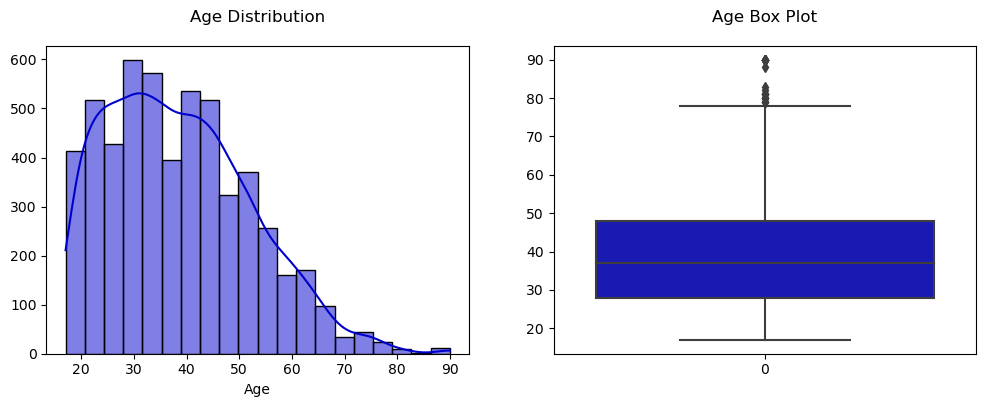

Skewness of Age : 0.5670672140494281


In [47]:
#Visualize (1) Age distribution
col = 'Age'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='mediumblue')
sns.boxplot(df[col], ax=axes[1], color='mediumblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Age
print(f"Skewness of {col} : {df[col].skew()}")


The distribution of Age is skewed to the right. There are outliers present in the Box plot.



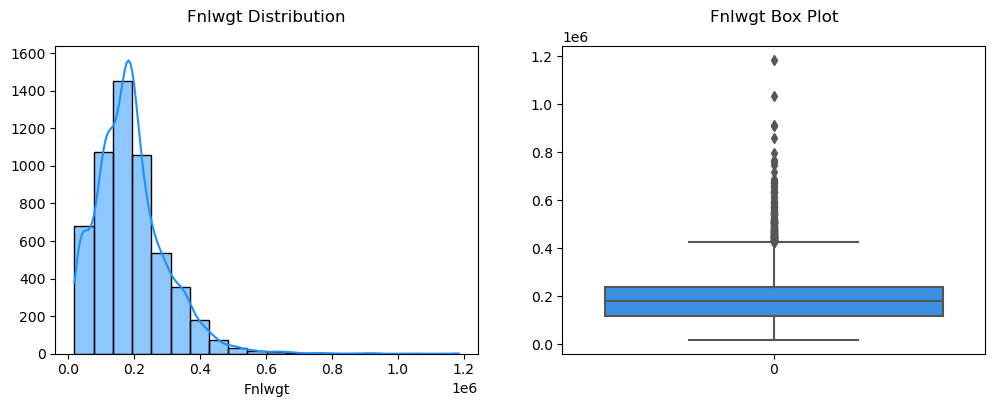

Skewness of Fnlwgt : 1.3194499037413328


In [48]:
#Visualize (2) Fnlwgt distribution
col = 'Fnlwgt'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='dodgerblue')
sns.boxplot(df[col], ax=axes[1], color='dodgerblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")


The distribution of Fnlwgt is skewed to the right. There are outliers present in the Box plot.



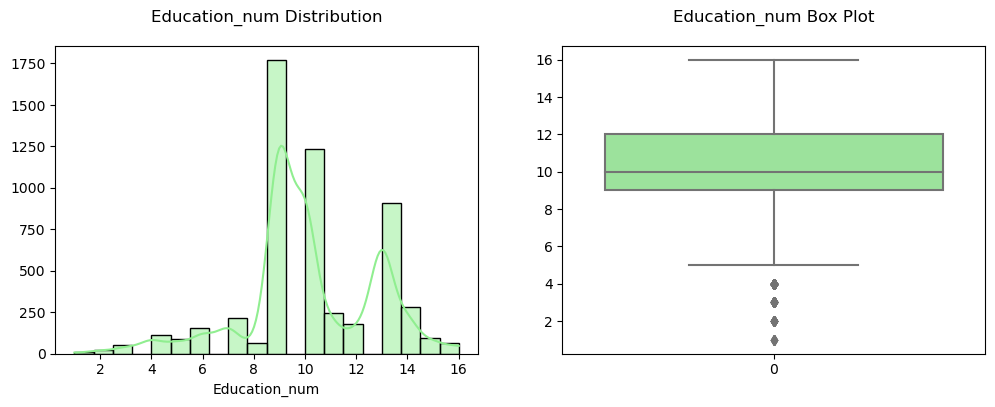

Skewness of Education_num : -0.2939229324015362


In [49]:
#Visualize (3) Education_num distribution
col = 'Education_num'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df[col], ax=axes[1], color='lightgreen')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Education_num
print(f"Skewness of {col} : {df[col].skew()}")


The distribution of Education_num is skewed to the left. There are outliers present in the Box plot. This feature despite being numerical, would be interesting to analyze as a categorical feature.



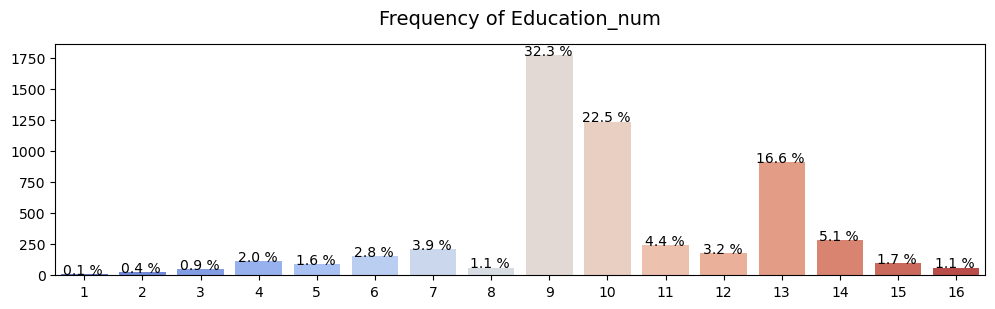

In [50]:
# Visualize the frequency of Education_num (3)
col = 'Education_num'
plt.figure(figsize=(12, 3))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(x=df_sorted.index, y=df_sorted[col], palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()


The majority of the observations correspond to who has 9 to 14 years of education.



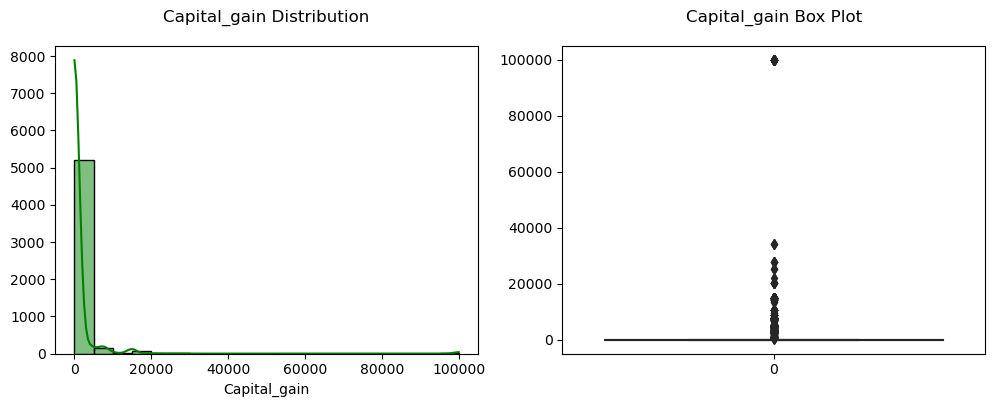

Skewness of Capital_gain : 12.273816973431524


In [51]:
#Visualize (4) Capital_gain distribution
col = 'Capital_gain'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='g')
sns.boxplot(df[col], ax=axes[1], color='g')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Capital_gain
print(f"Skewness of {col} : {df[col].skew()}")


The distribution of Capital_gain is skewed to the right. There are outliers present in the Box plot.



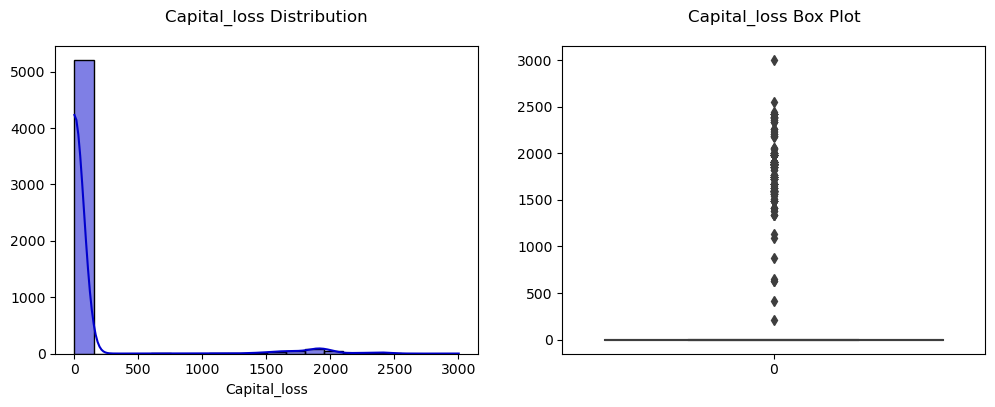

Skewness of Capital_loss : 4.272751235584711


In [52]:
#Visualize (5) Capital_loss distribution
col = 'Capital_loss'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='mediumblue')
sns.boxplot(df[col], ax=axes[1], color='mediumblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Capital_loss
print(f"Skewness of {col} : {df[col].skew()}")


The distribution of Capital_loss is skewed to the right. There are outliers present in the Box plot.



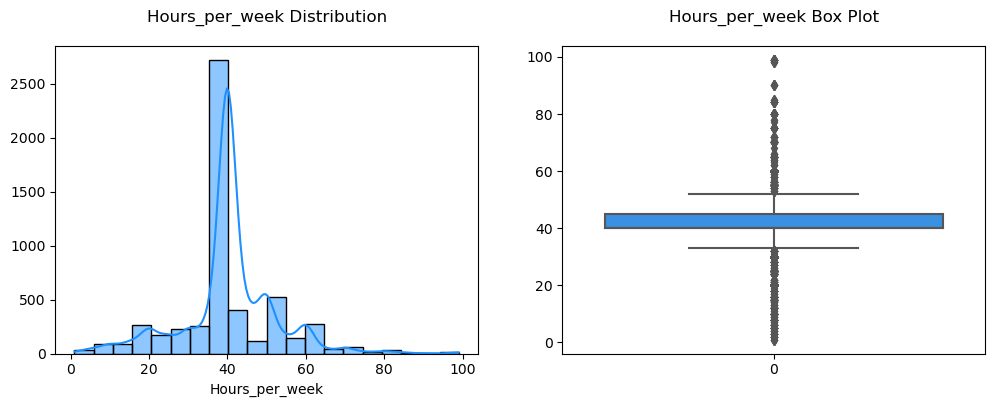

Skewness of Hours_per_week : 0.10090796861979012


In [53]:
#Visualize (6) Hours_per_week distribution
col = 'Hours_per_week'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='dodgerblue')
sns.boxplot(df[col], ax=axes[1], color='dodgerblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Hours_per_week
print(f"Skewness of {col} : {df[col].skew()}")


The distribution of Hours_per_week seems almost normal. There are outliers present in the Box plot.



###  Univariate Boxplot


In [54]:
numerical_col


['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

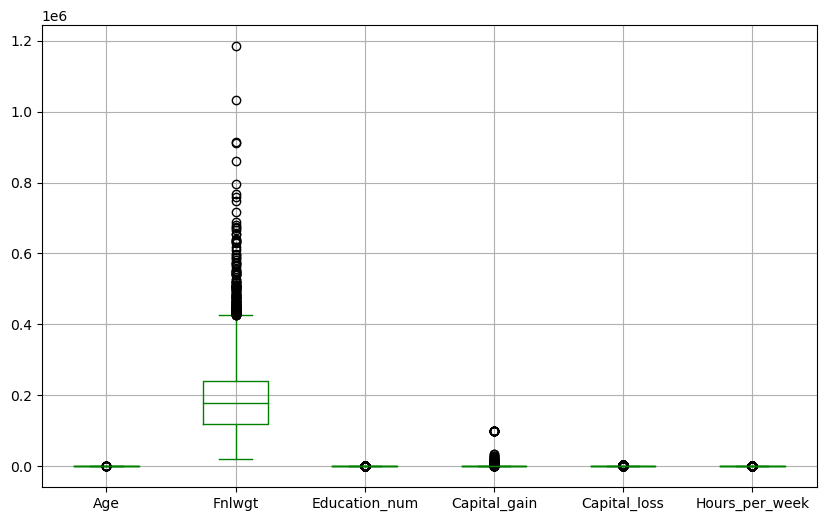

In [55]:
# Draw a boxplot for numericak variables
plt.figure(figsize=(10, 6))
df.boxplot(column=numerical_col, figsize=(10,10), color='green');


All numerical columns presents outliers. The data is in different scales.



### Bivariate Analysis


 BoxPlot Analysis: Summary of the distribution according to Income


In [56]:
# List of numerical columns
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")


1. Age
2. Fnlwgt
3. Education_num
4. Capital_gain
5. Capital_loss
6. Hours_per_week


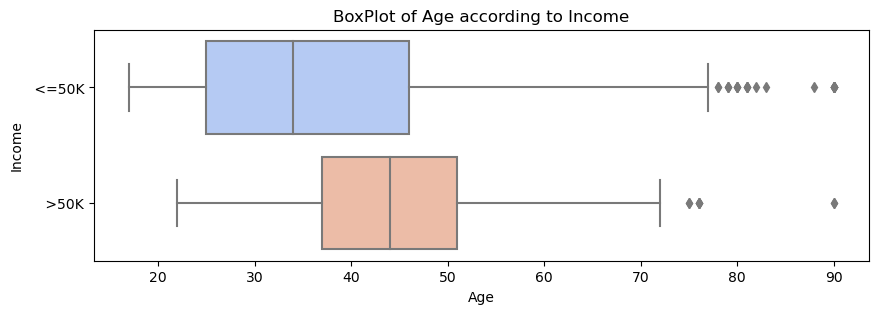

In [57]:
# Visualizing and comparing each independent variable with target
# Columns 1. Age 
col = 'Age'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()


Those with an income of more than >50k tend to be between 36 and 51 years old, and those with less income tend to be between 24 an 45 years old. There are outliers both for those with an income >50k and for those with a lower income. Seems like age has an influence on the target variable.



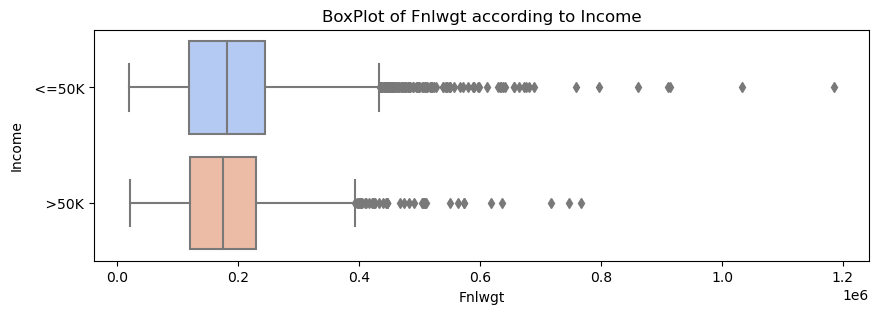

In [58]:
# Visualizing and comparing each independent variable with target
# Columns 2. Fnlwgt 
col = 'Fnlwgt'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()


The final weight (Fnlwgt) seems to behave similarly for those who have a >50 income as those who have a lower income. However, the group with an income <=50K presents more outliers. This feature seems to have no significant impact on the target variable.



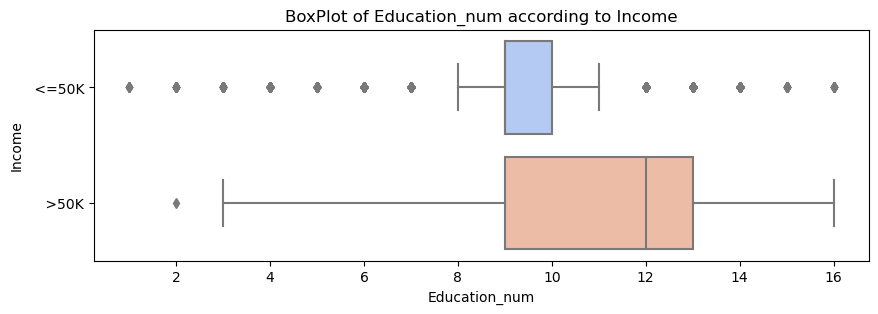

In [59]:
# Visualizing and comparing each independent variable with target
# Columns 3. Education_num 
col = 'Education_num'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()


It Seems like the Education number has an impact on those who have a >50K income since those who have 10 years of education or more tend to perceive >50k as income.


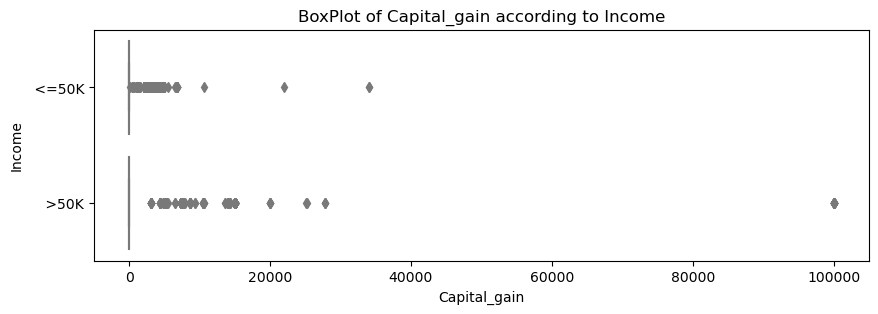

In [60]:
# Visualizing and comparing each independent variable with target
# Columns 4. Capital_gain 
col = 'Capital_gain'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()


The majority of observations of Capital gain are zeros. The other observations are shown as outliers.



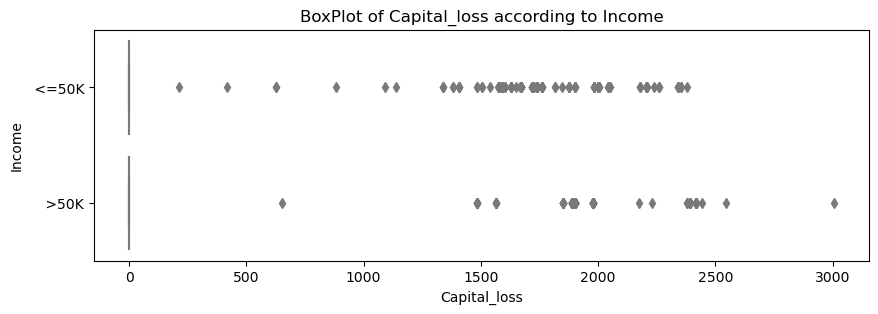

In [61]:
# Visualizing and comparing each independent variable with target
# Columns 5. Capital_loss 
col = 'Capital_loss'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()


The majority of observations of Capital loss are zeros. The other observations are shown as outliers.



### Further Analysis for Capital_gain and Capital_loss


In [62]:
# Filter the non-zero observations for Capital_gain/Capital_loss
df_capital = df[(df['Capital_gain'] > 0) | (df['Capital_loss'] > 0) ]
print(f"The non-zero observations represent {df_capital.shape[0]/df.shape[0] * 100:.2f}%.")
print(f"The dataframe dimensions with non-zero observations in Capital_gain and Capital_loss is {df_capital.shape}")


The non-zero observations represent 13.40%.
The dataframe dimensions with non-zero observations in Capital_gain and Capital_loss is (734, 16)


We will plot the boxplot for the sample with values in Capital gain and Capital loss in order to have a better view of the impact of these data on the target variable.



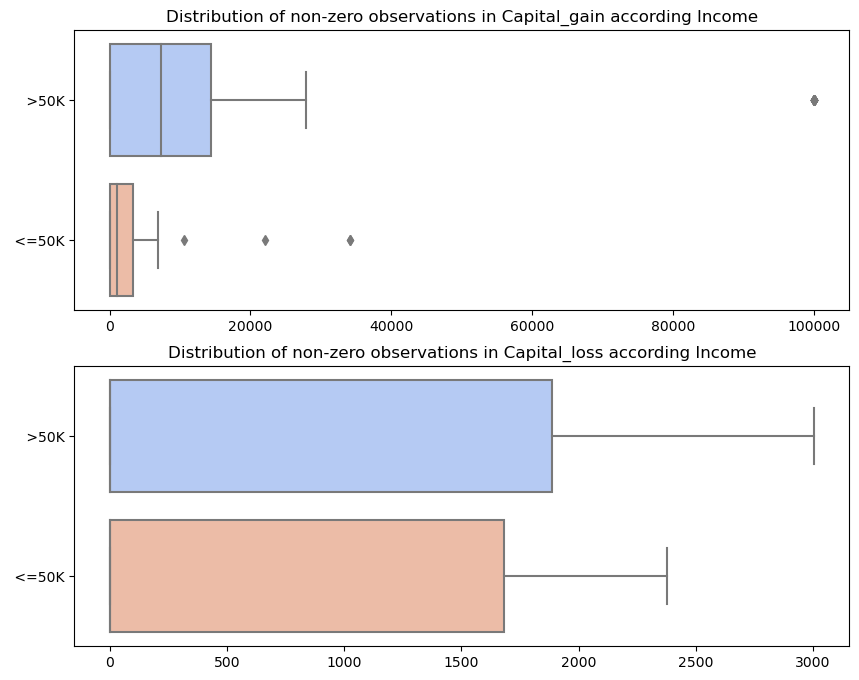

In [63]:
# Box-plot comparing the non-zero observation in Capital gain and Capital loss according to Income
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

col = 'Capital_gain'
sns.boxplot(data=df_capital[[col,'Income']], x=col, y='Income', palette='coolwarm', ax=axes[0])
axes[0].set_title(f"Distribution of non-zero observations in {col} according Income", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)

col = 'Capital_loss'
sns.boxplot(data=df_capital[[col,'Income']], x=col, y='Income', palette='coolwarm', ax=axes[1])
axes[1].set_title(f"Distribution of non-zero observations in {col} according Income", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].set_xlabel('', size=10, labelpad=8)

plt.show()


In the above plot, we can notice the impact of the non-zero values for Capital_gain/Capital_loss in the target variable. Those who have an income >50K had a capital gain more than those who have an income <=50K as we can see in the upper boxplot. On the other hand, those who have an income >50K had a capital loss slightly higher than those who have a lower income(<=50K)



For these variables, we will apply feature engineering to transform the columns dividing into intervals (binning).



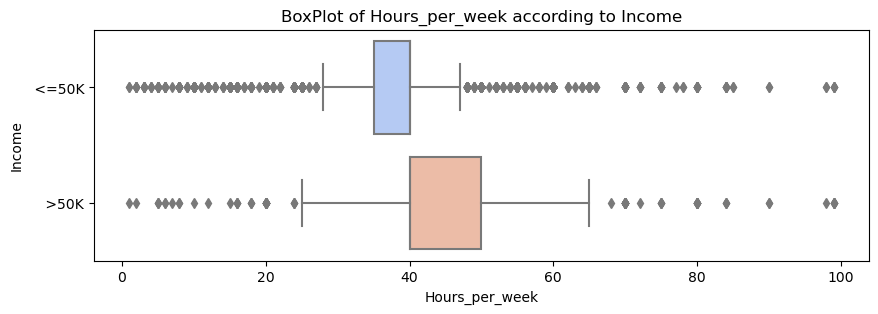

In [64]:
# Visualizing and comparing each independent variable with target
# Columns 6 Hours_per_week 
col = 'Hours_per_week'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()


Those who work 40 hours per week or more tend to have an income >50K. The majority of those who have an income <=50K tend to work less than 40 hours per week.



### Relation between target variable and categorical columns

In [65]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}")


1.Workclass
2.Education
3.Marital_status
4.Occupation
5.Relationship
6.Race
7.Sex
8.Native_country


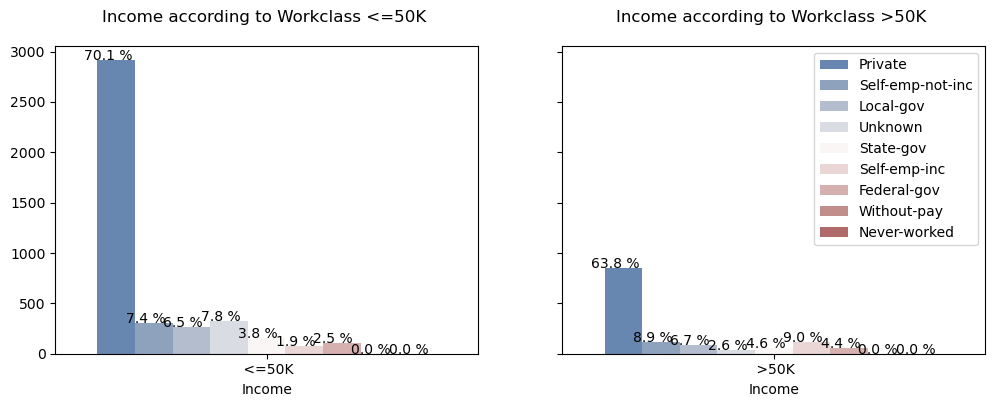

In [66]:
# Compare Workclass vs Income
col = 'Workclass' #1

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()


The majority of those who have an income >50K belong to private workclass with 63.3%. However, it is important to mention that those who have a lower income also mainly belong to private work classes, 71.7%.



Therefore we can conclude that the majority of the observations belong to the private work class regardless of their income range.



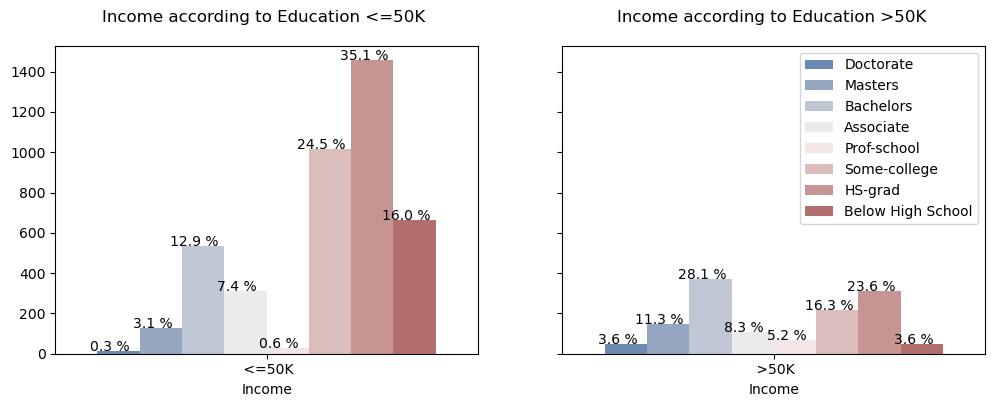

In [67]:
# Compare Education vs Income
col = 'Education' #2

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()


Seems the Education feature has an influence on the income range since the majority of those who have an income >50K have a Bachelor's degree, 28.3% specifically. While those with a lower income <=50K 35.7% are high school graduates, 23.9% have some college years of studies, and 16.2% haven't finished high school yet.



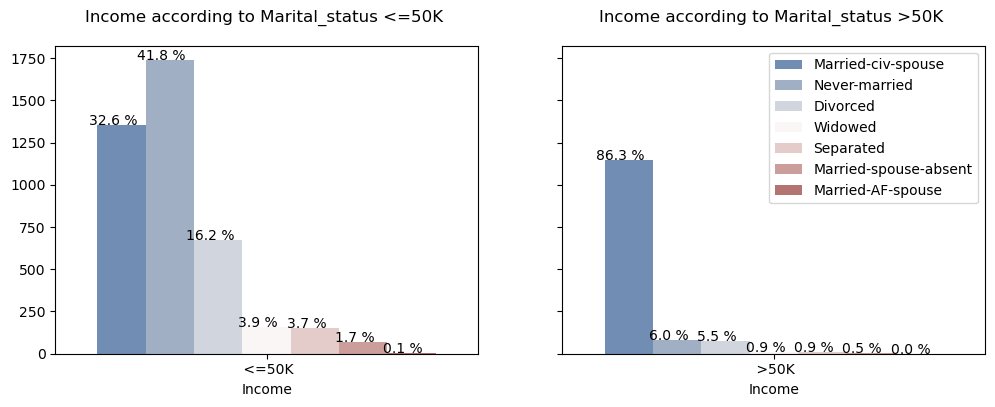

In [68]:
# Compare Marital_status vs Income
col = 'Marital_status' #3

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()


In [69]:
# Function to format % labels and specify the position for the 'Other' category
def format_label(pct):
    if pct < 5:  
        return f"{pct:.1f}%"
    return f"\n  {pct:.1f}%"


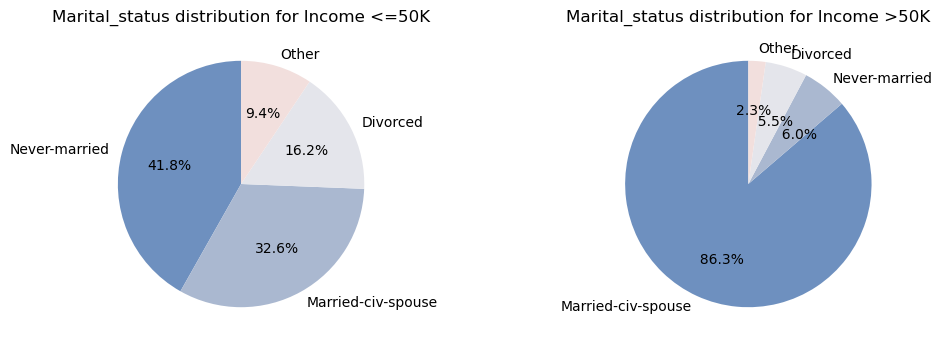

In [70]:
# Distribution of Marital Status according to Income
col = 'Marital_status' #3

sns.set_palette('vlag')

# Filter the data for the two income categories
df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

# Calculate the counts for each 'Marital_status' category in each income group
counts_less_50K = df_less_50K[col].value_counts()
counts_more_50K = df_more_50K[col].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Select 3 top categories for 'Income <=50K'
top_categories = counts_less_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_less_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income <=50K'
axes[0].pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title(f"{col} distribution for Income <=50K")

# Select 3 top categories for 'Income >50K'
top_categories = counts_more_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_more_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income >50K'
axes[1].pie(data, labels=labels, autopct=format_label, startangle=90)
axes[1].set_title(f"{col} distribution for Income >50K")

plt.show()


The majority of those who have an income >50K are married to a civilian spouse 85.3% while the other marital statuses have a minimal presence 6.3% or less.



In contrast, those who have an income less than <=50K mostly never had been married 41.2%, followed by 33.5% who are married to a civilian spouse, 16.1% divorced, and the rest 9.2% correspond to other marital statuses.



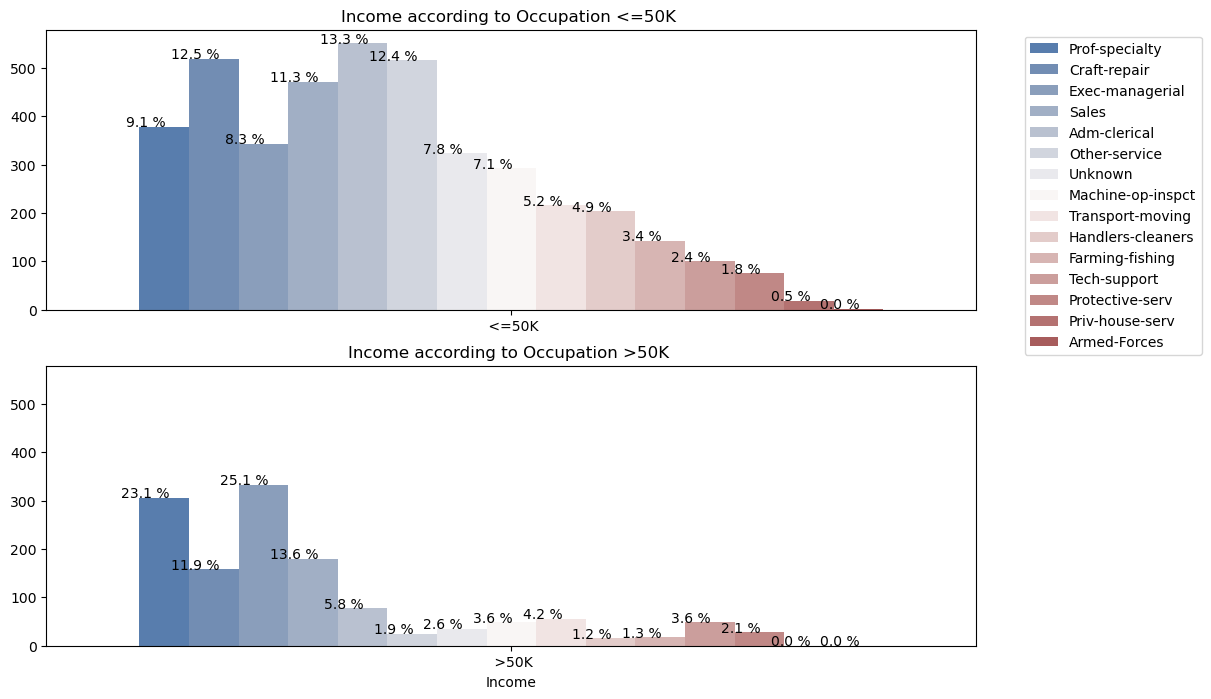

In [71]:
# Compare Occupation vs Income
col = 'Occupation' #4

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.25, 1))

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove()

plt.show()


According to the above plot, the more representative occupations for the group who have an >50K income are: 25.1% Exec-managerial, 23.7% Prof-specialty, 12.5% Sales, 11.9% Craft-repair, and 6.5% Adm-clerical. The other occupations have less than 4.2% representation.



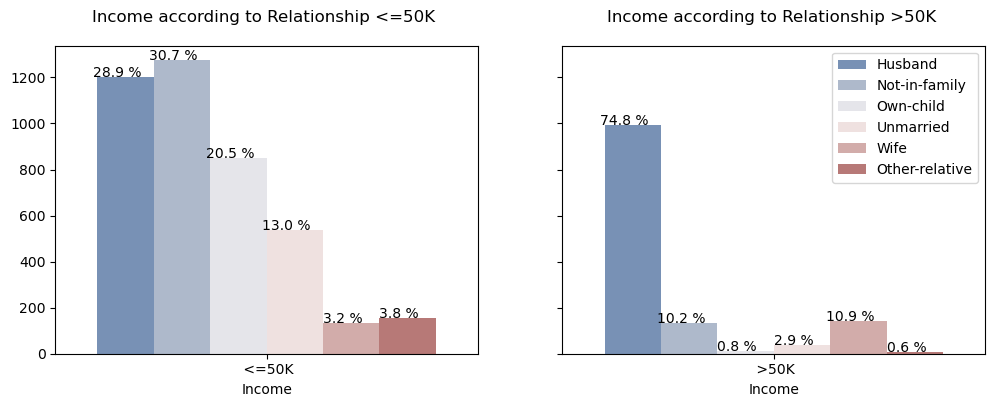

In [72]:
# Compare Relationship vs Income
col = 'Relationship' #5

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()


95.9% of those who have a >50K income are represented by 75.5% husbands, 10.9% not-in-family, and 9.5% wives. On the other hand, the most representative groups for those who have a lower income <=50K are 30.1% not-in-family, 29.4% husbands, 20.2% own-child, and 13.1% unmarried, 92.8% in total.



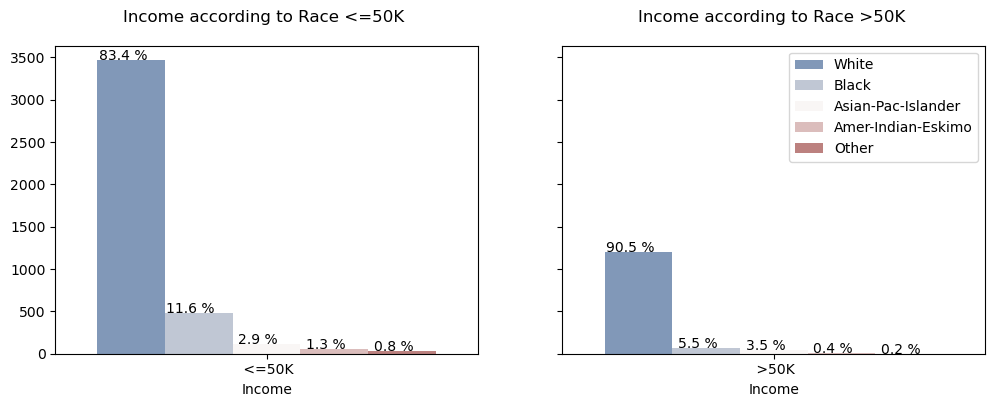

In [73]:
# Compare Race vs Income
col = 'Race' #6

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()


The most representative group in both groups, >50k and <=50K income, is the white race.



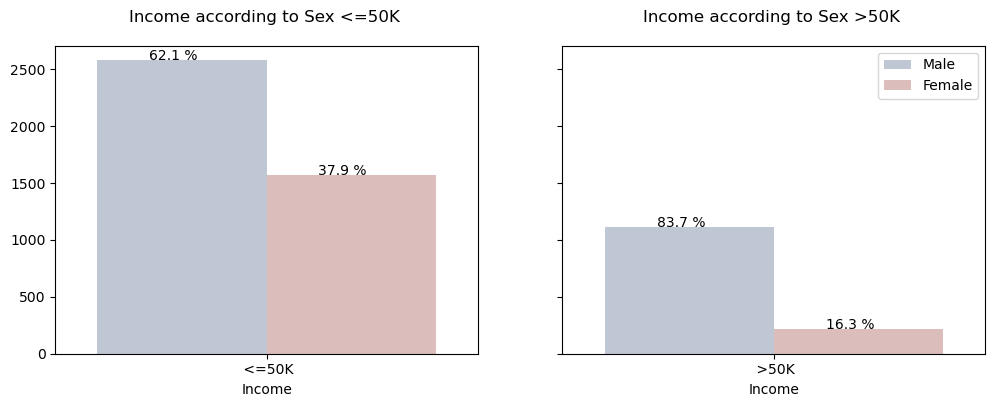

In [74]:
# Compare Sex vs Income
col = 'Sex' #7

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()


The ratio for those with an income of 50K or more is 85% males and 15% females. For the group with a lower income, the ratio is 61.2% males to 38.8% females. This implies that there are approximately 24% more males with >50K income.



In [75]:
# Function to format labels and specify the position for the percentages
def format_label_nc(pct):
    if (pct <= 2) & (pct > 1):   
        return f"\n{pct:.1f}%"
    return f"{pct:.1f}%"


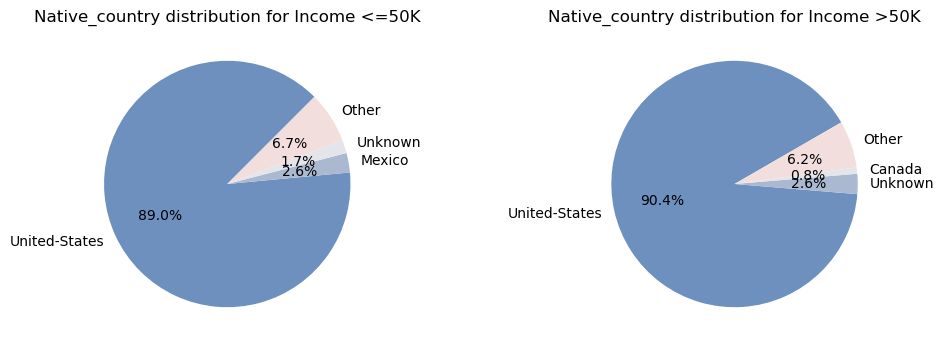

In [76]:
# Distribution of Native_country according to Income
col = 'Native_country' #8

sns.set_palette('vlag')

# Filter the data for the two income categories
df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

# Calculate the counts for each 'Marital_status' category in each income group
counts_less_50K = df_less_50K[col].value_counts()
counts_more_50K = df_more_50K[col].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Select 3 top categories for 'Income <=50K'
top_categories = counts_less_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_less_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income <=50K'
axes[0].pie(data, labels=labels, autopct='%1.1f%%', startangle=45)
axes[0].set_title(f"{col} distribution for Income <=50K")

# Select 3 top categories for 'Income >50K'
top_categories = counts_more_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_more_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income >50K'
axes[1].pie(data, labels=labels,  autopct=format_label_nc, startangle=30)
axes[1].set_title(f"{col} distribution for Income >50K")

plt.show()


The majority of the samples correspond to the United States, so in both the group with income >50K and the group with income <=50K this is the most representative group. However, from the above plot, we can see that for the group of those who earn >50K the second most representative group would be the Philippines with 0.8%, leaving aside the 1.9% that corresponds to missing data. In contrast, the second most representative group for those who have an income <=50K is Mexico with 2.5%.



 ### Relation between target variable and Numerical columns analyzed as categories


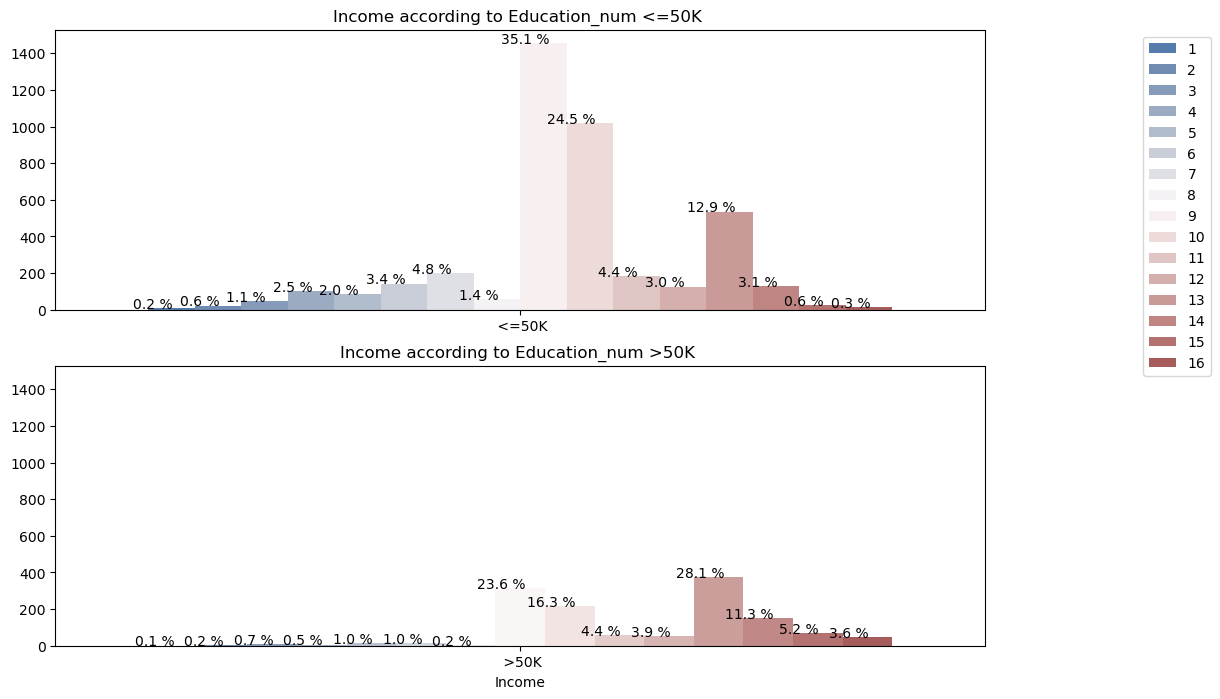

In [77]:
# Compare Education_num vs Income
col = 'Education_num' 

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.25, 1))

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove()

plt.show()


From the above plot, we observe that those who have a >50k income tend to have more than 9 years of education.



### Relation between Age and Fnlwgt


Since the Fnlwgt(The weights on the Current Population Survey CPS) are related to race, age, and sex according to the description of the present project we will analyze the relation between these features.



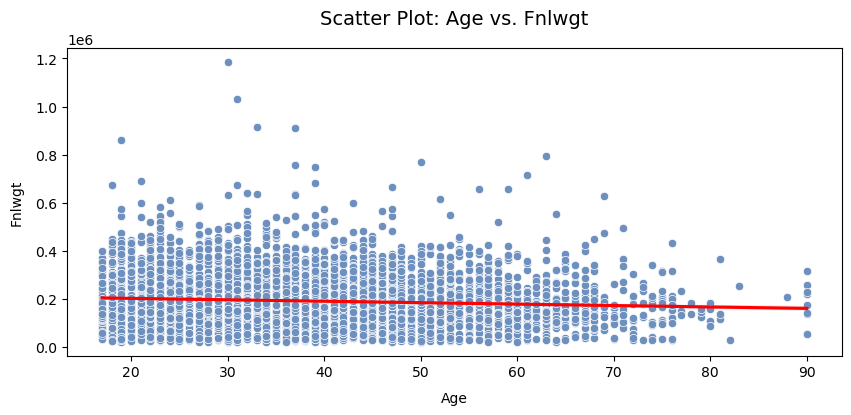

In [78]:
plt.figure(figsize=(10, 4))
col1 = 'Age'
col2 = 'Fnlwgt'
ax = sns.scatterplot(x=col1, y= col2, data=df)
sns.regplot(x=col1, y=col2, data=df, scatter=False, ax=ax, color='r')

plt.xlabel(col1, size=10, labelpad=8)
plt.ylabel(col2, size=10, labelpad=8)
plt.title(f'Scatter Plot: {col1} vs. {col2}', size=14, y=1.05);


Seems there is no clear relation between Age and Fnlwgt.



###  Distribution of Fnlwgt according to Race and Sex


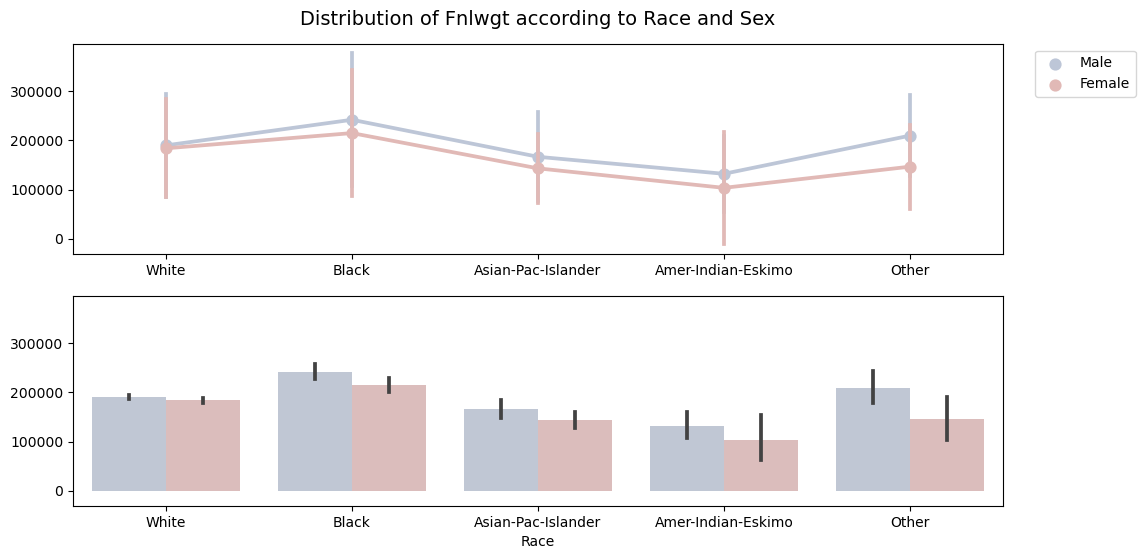

In [79]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharey=True)

col1 = 'Fnlwgt'
col2 = 'Race'
col3 = 'Sex'
# Comparing standar deviation with a pointplot
sns.pointplot(x=col2, y= col1, hue=col3, data=df, ci='sd', palette='vlag', ax=axes[0])
# Comparing the mean
sns.barplot(x=col2, y= col1, hue=col3, data=df, palette='vlag', ax=axes[1])

axes[0].set_title(f'Distribution of {col1} according to {col2} and {col3}', size=14, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove();


Above we can see the distribution of Fnlwgh according to the race and sex category, with the standar deviation for each category as the error bars in the upper plot, and the mean in the down and the mean in the below plot. The black race has a high variability especially in the male group.



##  Multivariate Analysis


### Pairplot

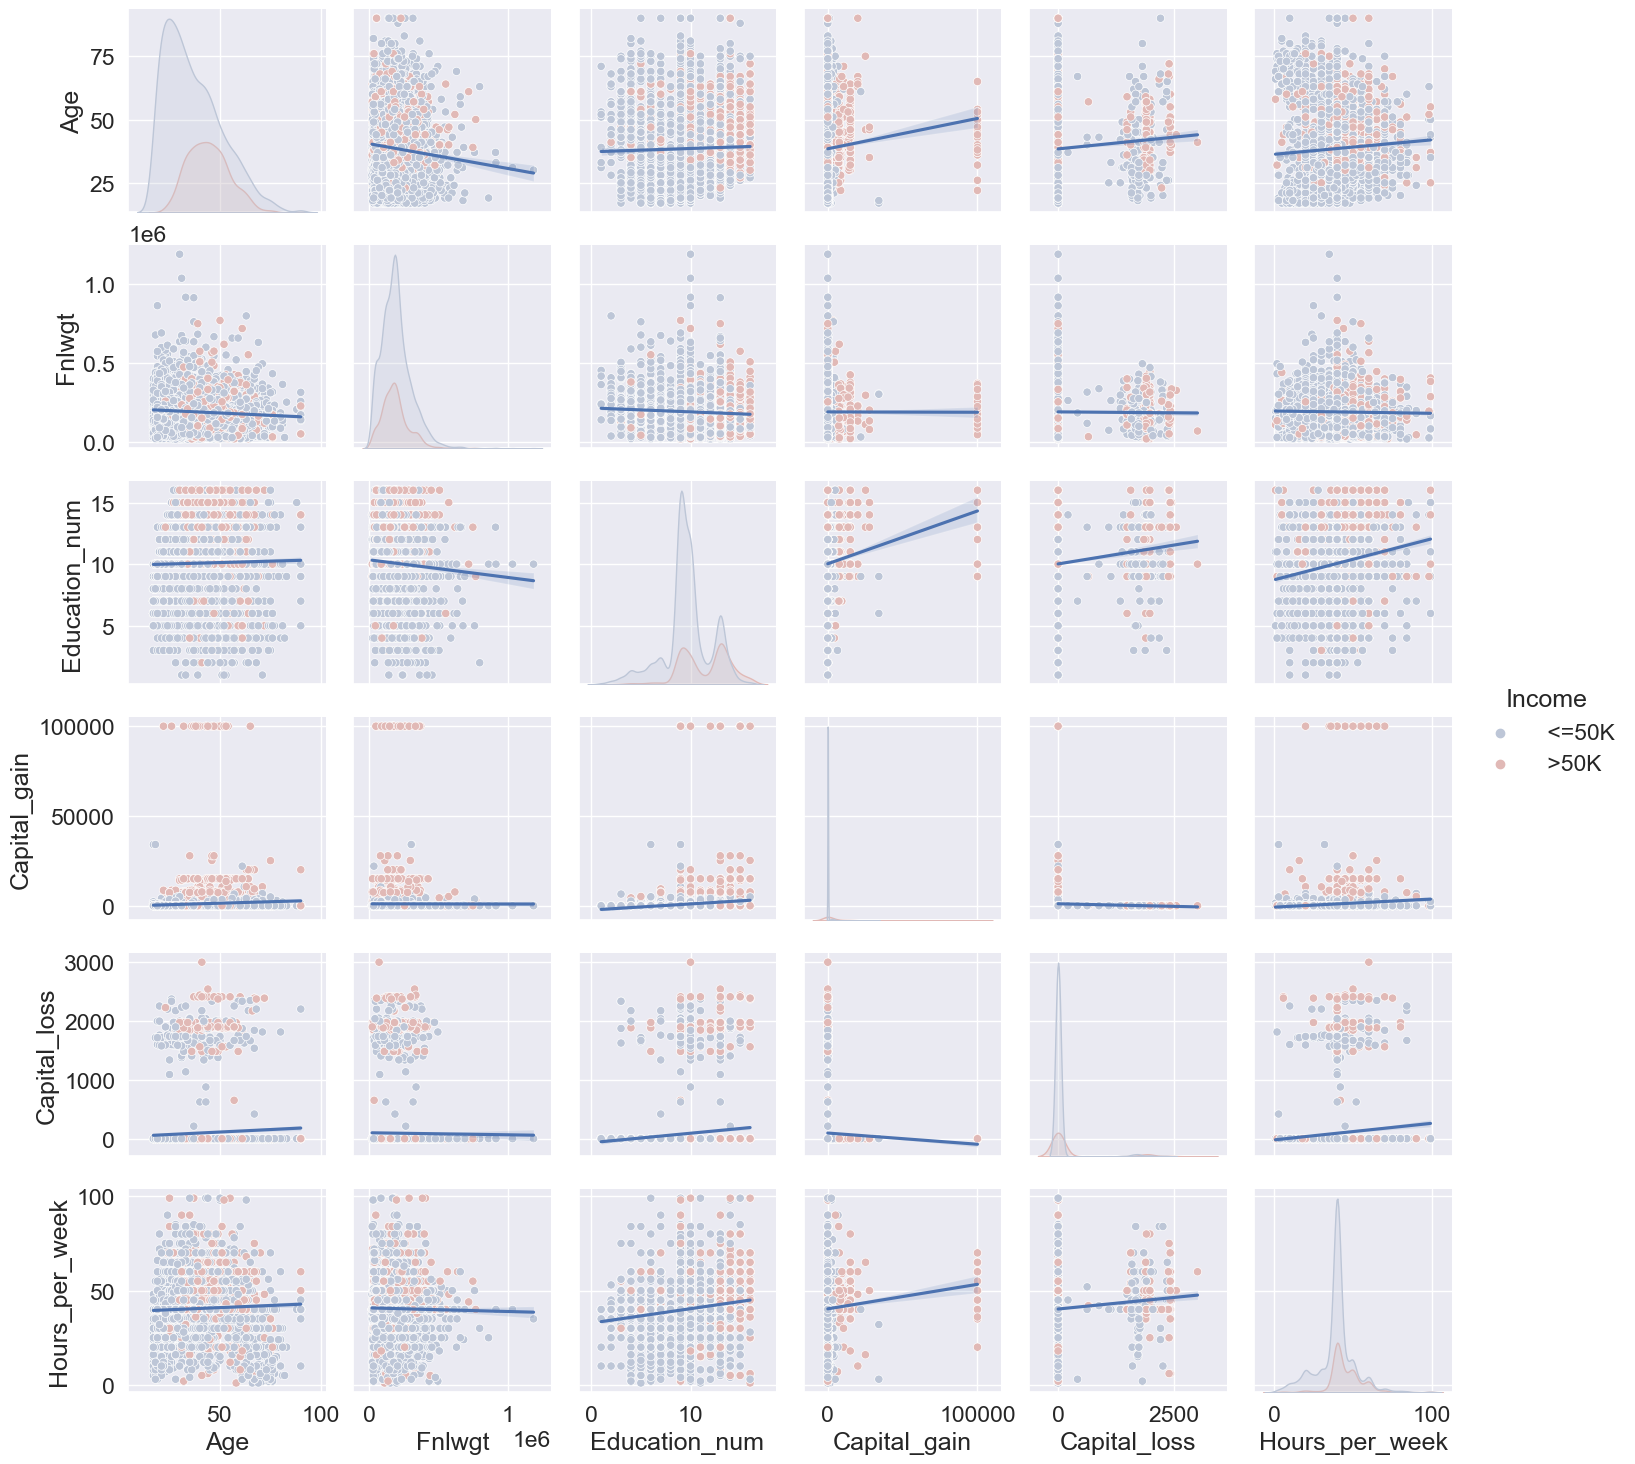

In [80]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='Income', palette = "vlag")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()


There is a positive correlation between Education_num, Capital_gain, and Hours_per_week.



### Encoding the target variable


First, we will delete the extra spaces in the target variable.



In [81]:
# Eliminating extra spaces 
df['Income'] = df['Income'].str.strip()

df['Income'].unique()


array(['<=50K', '>50K'], dtype=object)

In [82]:
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1})
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Bachelors
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,HS-grad
2,53,Private,234721,Below High School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,11th
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Bachelors
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,Masters


Now the label is encoded having values 1 for >50K and 0 for <=50K.



### Correlation between target variable and independent variables.


In [83]:
# Calculate the correlation between features
cor = df.corr()
cor


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076341,0.024584,0.062852,0.055969,0.050910,0.234192
Fnlwgt,-0.076341,1.000000,-0.059912,-0.001469,-0.008932,-0.016804,-0.025119
Education_num,0.024584,-0.059912,1.000000,0.120710,0.099269,0.159685,0.316696
Capital_gain,0.062852,-0.001469,0.120710,1.000000,-0.033174,0.076689,0.219524
Capital_loss,0.055969,-0.008932,0.099269,-0.033174,1.000000,0.083380,0.157471
Hours_per_week,0.050910,-0.016804,0.159685,0.076689,0.083380,1.000000,0.232578
Income,0.234192,-0.025119,0.316696,0.219524,0.157471,0.232578,1.000000


In [84]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Income') ]


,Feature A,Feature B,Corr coef
6,Income,Income,1.000000
8,Income,Education_num,0.316696
9,Income,Age,0.234192
11,Income,Hours_per_week,0.232578
14,Income,Capital_gain,0.219524
17,Income,Capital_loss,0.157471
41,Income,Fnlwgt,-0.025119


The label has a medium positive correlation with Education_num, and a low positive correlation with Age, Hours_per_week, Capital_gain, and Capital-loss.



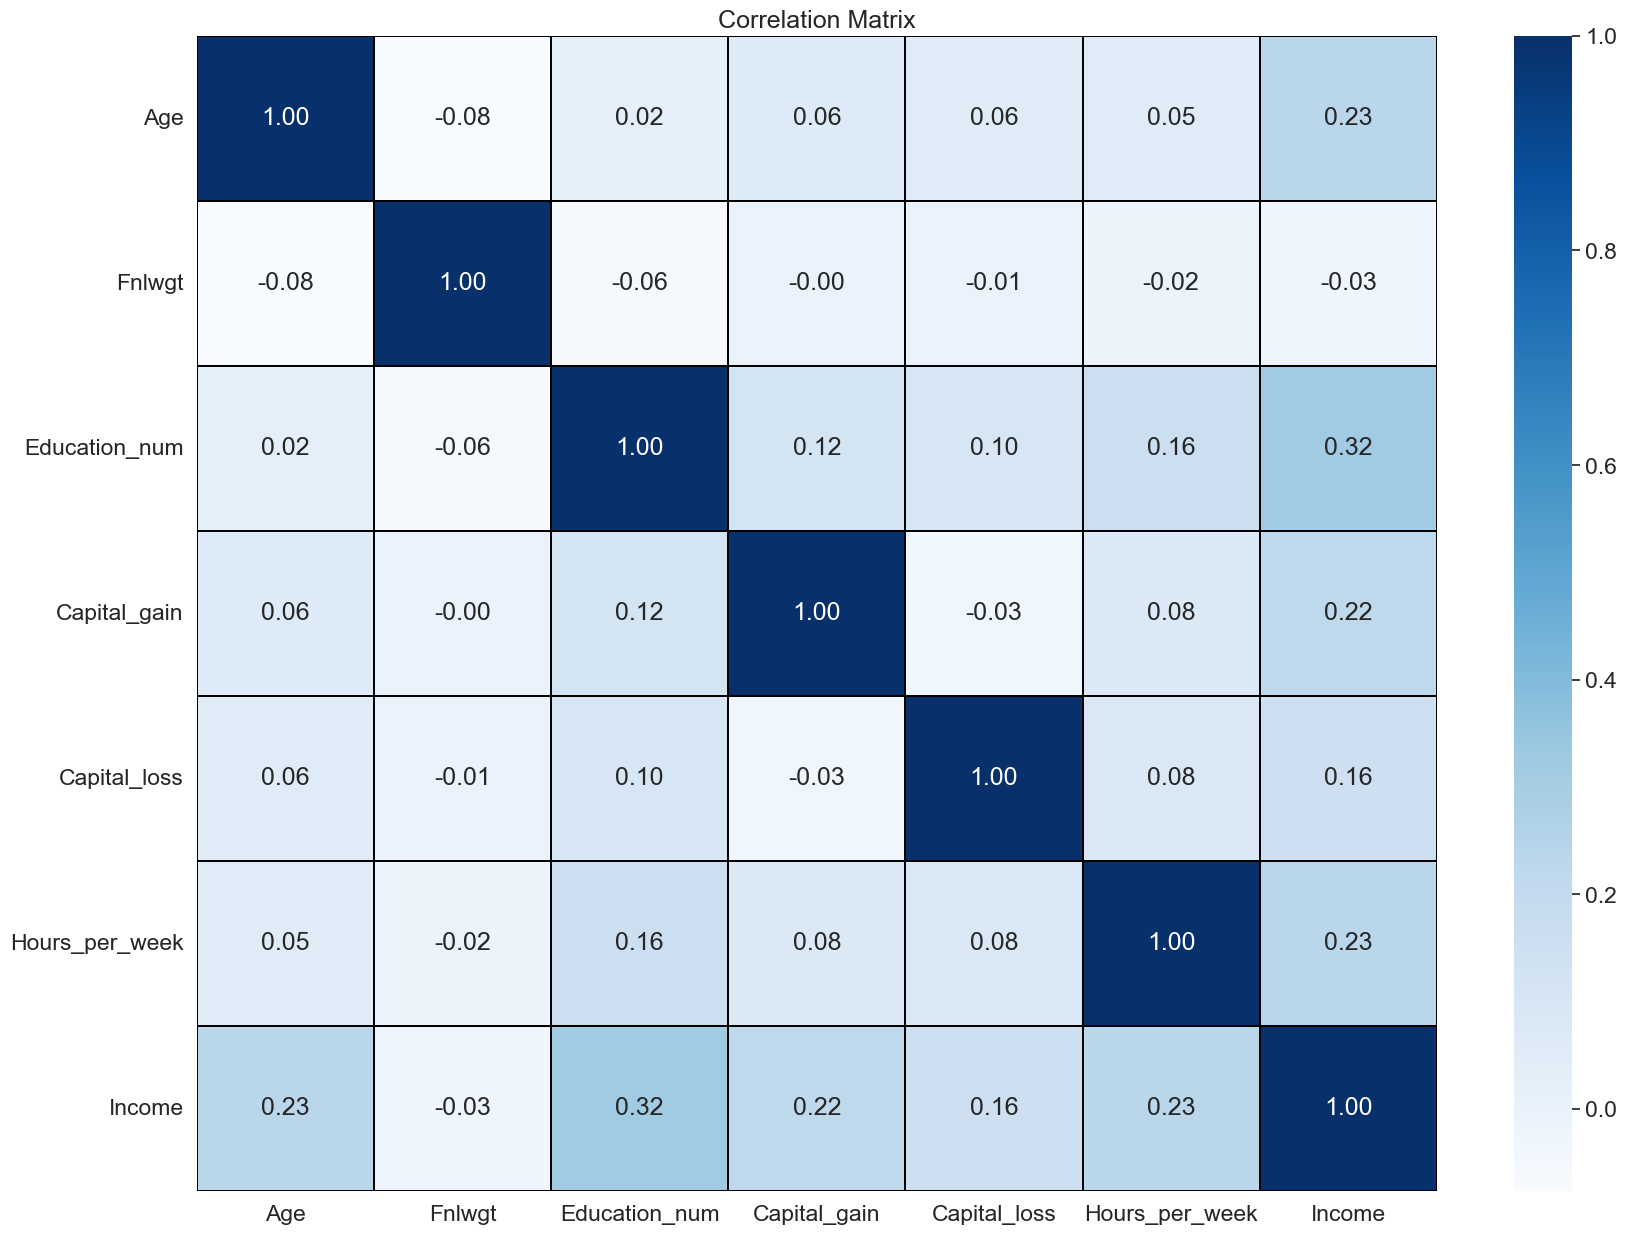

In [85]:
sns.set(font_scale=1.5)  

# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()


This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to label.



This heatmap contains both positive and negative correlations.
The target is medium correlated with Education_num(+0.34), and low correlated with Hours_per_week(+0.23), Age(+0.23), Capital_gain(+0.22), and Capital_loss(+0.15)
The Education_num is slightly correlated with Hours_per_week(+0.15) and Capital_gain(+0.12)


##  Preprocessing Data


###  Missing values


In Section 1.2 we found out that apparently the dataset has missing values. However, in the Workclass, Occupation, and Native_country columns there are "?: Unknown" values that represent missing values. In this section, we will manage this issue.



In [86]:
# Replace Unknown for np.NaN
for col in ['Workclass', 'Occupation', 'Native_country']:
    print(f"Values for {col}:\n{df[col].value_counts(dropna=False)[:8]}\n")
    df[col] = np.where(df[col]=='Unknown', np.NaN, df[col])
    print(f"New Values for {col}:\n{df[col].value_counts(dropna=False)[:8]}\n")


Values for Workclass:
Private             3759
Self-emp-not-inc     425
Local-gov            359
Unknown              357
State-gov            217
Self-emp-inc         198
Federal-gov          162
Without-pay            1
Name: Workclass, dtype: int64

New Values for Workclass:
Private             3759
Self-emp-not-inc     425
Local-gov            359
NaN                  357
State-gov            217
Self-emp-inc         198
Federal-gov          162
Without-pay            1
Name: Workclass, dtype: int64

Values for Occupation:
Prof-specialty       684
Craft-repair         677
Exec-managerial      676
Sales                651
Adm-clerical         628
Other-service        540
Unknown              358
Machine-op-inspct    341
Name: Occupation, dtype: int64

New Values for Occupation:
Prof-specialty       684
Craft-repair         677
Exec-managerial      676
Sales                651
Adm-clerical         628
Other-service        540
NaN                  358
Machine-op-inspct    341
Name: Oc

The 'Unknown' values were encoded to NaN. Now, we will check for missing values.



In [87]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val


,Null values,% of missing
Age,0,0.00
Workclass,357,6.52
Fnlwgt,0,0.00
Education,0,0.00
Education_num,0,0.00
Marital_status,0,0.00
Occupation,358,6.53
Relationship,0,0.00
Race,0,0.00
Sex,0,0.00


In the above columns, we have missing values. For the Native_country column less than 1.80% of missing values, then we will drop them. For the other columns(Workclass and Occupation) we will impute the missing values according to the nature feature, using the mode.



###  Dropping missing values less than 1.8% of missing


Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. However, we are going to set the threshold as 2% in order to lose less than 1.8% of data.



In [88]:
cols_less_than_thr = missing_val[(missing_val['% of missing'] > 0) & (missing_val['% of missing'] < 2)].index.to_list()
cols_less_than_thr


['Native_country']

In [89]:
# Dropping the missing values with % of missing less than 2.4%
df_new = df.dropna(subset=cols_less_than_thr)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()


107 rows with missing values were deleted.
This represent 1.95% of the data.
In the new dataset there are 5372 rows and 16 columns.


###  Imputing missing values


In [90]:
cols_more_than_thr = missing_val[missing_val['% of missing'] > 2].index.to_list()
cols_more_than_thr


['Workclass', 'Occupation']

For Workclass and Occupation columns we will use the mode to impute the missing values since they are categorical variables.



In [91]:
# listing the possible imputation values 
for col in cols_more_than_thr:
    print(f"Column = {col} Mode = {df[col].mode()[0]}")


Column = Workclass Mode = Private
Column = Occupation Mode = Exec-managerial


To make a more accurate analysis, we will use the mode according to Income and Education.



In [92]:
impu_val = {}

# Define Columns to group the data
group_col = ['Income','Education']

# List of mode according
for col in cols_more_than_thr:
    impu_val[col] = df.groupby(group_col)[[col]].agg(lambda x: x.mode().iloc[0])
    print(f"Imputation values for {col}:\n{impu_val[col]}\n")


Imputation values for Workclass:
                         Workclass
Income Education                  
0      Doctorate           Private
       Masters             Private
       Bachelors           Private
       Associate           Private
       Prof-school         Private
       Some-college        Private
       HS-grad             Private
       Below High School   Private
1      Doctorate           Private
       Masters             Private
       Bachelors           Private
       Associate           Private
       Prof-school         Private
       Some-college        Private
       HS-grad             Private
       Below High School   Private

Imputation values for Occupation:
                                Occupation
Income Education                          
0      Doctorate            Prof-specialty
       Masters              Prof-specialty
       Bachelors            Prof-specialty
       Associate              Adm-clerical
       Prof-school          Prof-specialty
 

For Workclass we will use Private to impute the missing values.
For Occupation we will use the corresponding mode according to Income and Education to impute the missing values.


In [93]:
# Imputing missing values for Workclass 
impute_value = 'Private'
col = 'Workclass'
print(f"Impute the missing values in {col} with the mode: {impute_value}")

# Fill missing values with the impute value 
df[col].fillna(impute_value, inplace=True)
print(f"Missing values in {col}: {df[col].isnull().sum()}\n")


Impute the missing values in Workclass with the mode: Private
Missing values in Workclass: 0



In [94]:
# Imputing missing values for Occupation
col = 'Occupation'
mapping_dict = impu_val[col].to_dict()
print(f"Impute the missing values in {col} with the mode:")
display(mapping_dict)


Impute the missing values in Occupation with the mode:


{'Occupation': {(0, 'Doctorate'): 'Prof-specialty',
  (0, 'Masters'): 'Prof-specialty',
  (0, 'Bachelors'): 'Prof-specialty',
  (0, 'Associate'): 'Adm-clerical',
  (0, 'Prof-school'): 'Prof-specialty',
  (0, 'Some-college'): 'Adm-clerical',
  (0, 'HS-grad'): 'Craft-repair',
  (0, 'Below High School'): 'Other-service',
  (1, 'Doctorate'): 'Prof-specialty',
  (1, 'Masters'): 'Exec-managerial',
  (1, 'Bachelors'): 'Exec-managerial',
  (1, 'Associate'): 'Craft-repair',
  (1, 'Prof-school'): 'Prof-specialty',
  (1, 'Some-college'): 'Exec-managerial',
  (1, 'HS-grad'): 'Craft-repair',
  (1, 'Below High School'): 'Transport-moving'}}

In [95]:
# Fill missing values with the impute value 
df[col] = df[col].fillna(df.apply(lambda row: mapping_dict[col].get((row['Income'], row['Education']), row[col]), axis=1))
print(f"Missing values in {col}: {df[col].isnull().sum()}\n")


Missing values in Occupation: 0



### Last check for missing values


In [96]:
 df.isnull().sum().sum()


0

No missing values to remove.



###  Encoding Categorical features


Preprocessing the data to train the model. As we know the models understand numbers, so it is necessary to encode the categorical data, in our case the columns Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, and Native_country. Income was encoded previously.



In [97]:
 # Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:\n  {df[col].unique()}\n")


1.Workclass:
  ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

2.Education:
  ['Bachelors', 'HS-grad', 'Below High School', 'Masters', 'Some-college', 'Associate', 'Doctorate', 'Prof-school']
Categories (8, object): ['Doctorate' < 'Masters' < 'Bachelors' < 'Associate' < 'Prof-school' < 'Some-college' < 'HS-grad' < 'Below High School']

3.Marital_status:
  ['Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed']
Categories (7, object): ['Married-civ-spouse' < 'Never-married' < 'Divorced' < 'Widowed' < 'Separated' < 'Married-spouse-absent' < 'Married-AF-spouse']

4.Occupation:
  ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

5.Relationship:
  ['Husband', 'Not-in-family',

We will use LabelEncoder to encode all the categorical columns.



In [98]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}
encoding_col = categorical_col[:-1]

label_encoder = LabelEncoder()
for col in encoding_col:
    if col != 'Education':
        df[col] = df[col].astype('category')
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(col,'\n', category_mappings[col],'\n')
    
display(df.head())
display(df.tail())


Workclass 
 {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7} 

Education 
 {'Associate': 0, 'Bachelors': 1, 'Below High School': 2, 'Doctorate': 3, 'HS-grad': 4, 'Masters': 5, 'Prof-school': 6, 'Some-college': 7} 

Marital_status 
 {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6} 

Occupation 
 {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13} 

Relationship 
 {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5} 

Race 
 {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4} 

Sex 
 {'

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,36,0,Bachelors
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,36,0,HS-grad
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,36,0,11th
3,28,3,338409,1,13,2,9,5,2,0,0,0,40,4,0,Bachelors
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,36,0,Masters


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
5476,19,6,156294,7,10,4,9,3,4,1,0,0,25,36,0,Some-college
5477,51,3,254211,1,13,2,2,0,4,1,0,0,20,36,1,Bachelors
5478,41,3,151504,1,13,2,3,0,4,1,7688,0,50,36,1,Bachelors
5479,61,3,85548,7,10,2,12,0,4,1,15024,0,18,36,1,Some-college
5480,19,5,30800,2,6,3,0,4,0,0,0,0,40,36,0,10th


In [99]:
# Drop the Education_bk column 
df.drop('Education_bk', axis=1, inplace=True)


All the categorical features were encoded. The Education_bk column is no longer needed, so we dropped it.



###  Removing outliers


We apply zscore to detect the outliers



In [100]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.837717,1.721761,1.002946,1.169430,1.158903,0.407715,0.692403,0.908886,0.393926,0.699519,0.144561,0.226936,2.261865,0.269031,0.562731
1,0.040203,0.080870,0.232359,0.134377,0.422610,1.728333,0.199742,0.289196,0.393926,0.699519,0.144561,0.226936,0.037632,0.269031,0.562731
2,1.057197,0.080870,0.410418,0.734828,1.213367,0.407715,0.199742,0.908886,1.967870,0.699519,0.144561,0.226936,0.037632,0.269031,0.562731
3,0.771802,0.080870,1.378312,1.169430,1.158903,0.407715,0.785580,2.189562,1.967870,1.429554,0.144561,0.226936,0.037632,5.024874,0.562731
4,0.113363,0.080870,0.875854,0.568980,1.554281,0.407715,0.692403,2.189562,0.393926,1.429554,0.144561,0.226936,0.037632,0.269031,0.562731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,1.430242,2.623077,0.321673,1.438185,0.027232,0.912903,0.785580,0.950183,0.393926,0.699519,0.144561,0.226936,1.273317,0.269031,0.562731
5477,0.910877,0.080870,0.592351,1.169430,1.158903,0.407715,0.938734,0.908886,0.393926,0.699519,0.144561,0.226936,1.685212,0.269031,1.777047
5478,0.179277,0.080870,0.366386,1.169430,1.158903,0.407715,0.692403,0.908886,0.393926,0.699519,0.939798,0.226936,0.786158,0.269031,1.777047
5479,1.642476,0.080870,0.982065,1.438185,0.027232,0.407715,1.524571,0.908886,0.393926,0.699519,1.974509,0.226936,1.849970,0.269031,1.777047


In [101]:
# threshold = 3.55
df_new = df[(z<3.55).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df_process = df_new.copy()
df_process


559 rows with outliers were deleted.
This represent 10.41% of the data.
In the new dataset there are 4813 rows and 15 columns.


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,36,0
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,36,0
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,36,0
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,36,0
5,49,3,160187,2,5,3,7,1,2,0,0,0,16,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,21,3,203914,7,10,4,7,3,4,0,0,0,10,36,0
5476,19,6,156294,7,10,4,9,3,4,1,0,0,25,36,0
5477,51,3,254211,1,13,2,2,0,4,1,0,0,20,36,1
5478,41,3,151504,1,13,2,3,0,4,1,7688,0,50,36,1


In order to avoid losing more than 10% of the data threshold was defined as 3.55 instead of 3. Therefore only 9.73% of the data was lost.



### Feature Engineering


As we see in the 1.4.2 Section, the Capital_gain and Capital_loss variables have less than 10% of non-zero observations.



Therefore, we will apply feature engineering to transform the columns dividing into intervals (binning). Binning can make the interpretation of the relationship between the variable and the target more intuitive.



###  Discretization of Capital_gain


We will plot a histogram of the non-zero values to determine the right number of bins.



Number of bins selected for Capital_gain: 18


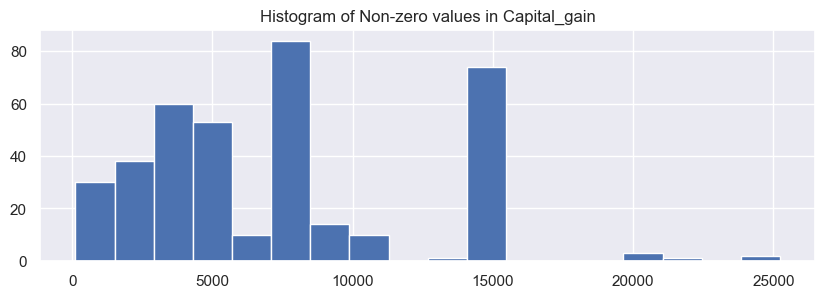

In [102]:
# Filter the non-zero values 
col = 'Capital_gain'
non_zero_values = df_process[col][df_process[col] != 0]

# Styling the plot
sns.set(font_scale=1)
plt.figure(figsize=(10, 3))

# Plot the histograma ('auto' uses a heuristic to determine the number of bins)
n, bins, _ = plt.hist(non_zero_values, bins='auto') 
plt.title(f"Histogram of Non-zero values in {col}")

# Get the number of bins chosen automatically
num_bins_auto = len(bins) - 1
print(f'Number of bins selected for {col}: {num_bins_auto}')
plt.show()


Now, we will divide the continuous variable into 32 discrete intervals or bins.



In [103]:
# Dividing into intervals 
df_process[f'{col}_bin'] = pd.cut(df_process[col], bins=num_bins_auto, labels=False, include_lowest=True)

# Review the unique values of the new variable Capital_gain_bin
print(f"Unique values in {col}_bin: \n{df_process[f'{col}_bin'].unique()}\n")
print(f"Total of unique values in {col}_bin: {df_process[f'{col}_bin'].nunique()}")
print(f"Counts of {col}_bin:\n{df_process[f'{col}_bin'].value_counts()}")


Unique values in Capital_gain_bin: 
[ 0 10  3  1  5  2 14  4  6 17  7 15  9]

Total of unique values in Capital_gain_bin: 13
Counts of Capital_gain_bin:
0     4456
5       84
10      74
2       67
3       53
1       38
6       14
4       10
7       10
14       3
17       2
15       1
9        1
Name: Capital_gain_bin, dtype: int64


###  Discretization of Capital_loss¶


We will apply the same steps for Capital_loss.



Number of bins selected for Capital_loss: 6


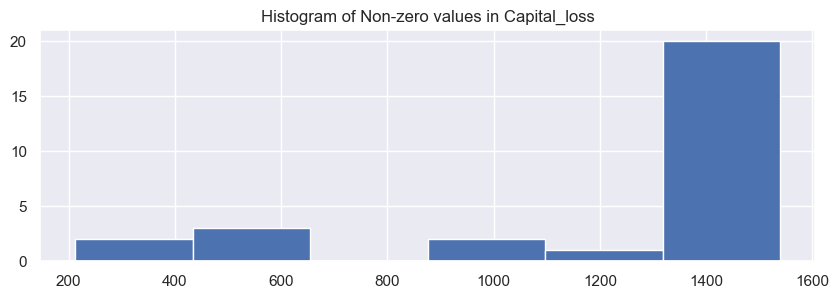

In [104]:
# Filter the non-zero values 
col = 'Capital_loss'
non_zero_values = df_process[col][df_process[col] != 0]

# Styling the plot
sns.set(font_scale=1)
plt.figure(figsize=(10, 3))

# Plot the histograma ('auto' uses a heuristic to determine the number of bins)
n, bins, _ = plt.hist(non_zero_values, bins='auto') 
plt.title(f"Histogram of Non-zero values in {col}")

# Get the number of bins chosen automatically
num_bins_auto = len(bins) - 1
print(f'Number of bins selected for {col}: {num_bins_auto}')
plt.show()


Now, we will divide the continuous variable into 9 discrete intervals or bins.



In [105]:
# Dividing into intervals 
df_process[f'{col}_bin'] = pd.cut(df_process[col], bins=num_bins_auto, labels=False, include_lowest=True)

# Review the unique values of the new variable Capital_gain_bin
print(f"Unique values in {col}_bin: \n{df_process[f'{col}_bin'].unique()}\n")
print(f"Total of unique values in {col}_bin: {df_process[f'{col}_bin'].nunique()}")
print(f"Counts of {col}_bin:\n{df_process[f'{col}_bin'].value_counts()}")


Unique values in Capital_loss_bin: 
[0 5 2 1 4 3]

Total of unique values in Capital_loss_bin: 6
Counts of Capital_loss_bin:
0    4786
5      20
2       3
4       2
1       1
3       1
Name: Capital_loss_bin, dtype: int64


In [106]:
# Drop the no-needed columns
df_process.drop(['Capital_gain','Capital_loss'], axis=1, inplace=True)


Since the Capital_gain_bin and Capital_loss_bin columns replace Capital_gain and Capital_loss, we do not longer need the last onces.



###  Skewness Correction


In [107]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew


,Skew
Capital_loss_bin,14.157734
Capital_gain_bin,5.217082
Income,1.321697
Relationship,0.739410
Fnlwgt,0.722636
Age,0.521772
Occupation,0.145846
Workclass,0.084541
Education,0.059915
Marital_status,-0.046731


Considering the skewness of the continuous numerical columns:



Fnlwgt (0.746847)
Age (0.527576)


is greater than 0.5 or lower than -0.5, we are going to apply methods to remove it. The other features are not considered since they are categorical or discrete.



We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.



In [108]:
# Checking skewness using cuberoot, square-root and log method
skew_columns = ['Fnlwgt', 'Age']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_process[col])
    df_transformed[f"{col}_log"] = np.log(df_process[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_process[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_process[skew_columns]], axis=1)


We will select the best transformation method looking for the minimum absolute value of skewness.



In [109]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for 
display(df_comp[df_comp['feature'] == 'Age'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness


,index,Skewness,feature,Skewness_abs
4,Age_sqrt,0.189723,Age,0.189723
5,Age_log,-0.130114,Age,0.130114
6,Age_cbrt,0.081847,Age,0.081847


,index,Skewness,feature,Skewness_abs
6,Age_cbrt,0.081847,Age,0.081847
0,Fnlwgt_sqrt,-0.050854,Fnlwgt,0.050854


After comparing the resulting skewness, we are going to apply the square-root method for the Fnlwgt feature, and cube-root method to Age.



In [110]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['Age']
print(cbrt_columns)

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df_process[col] = np.cbrt(df_process[col])


['Age']


In [111]:
# Transform the Fnlwgt column - sqrt
df_process['Fnlwgt'] = np.sqrt(df_process['Fnlwgt'])


In [112]:
df_process[skew_columns].skew().sort_values(ascending=False).to_frame("Skewness after transform")


,Skewness after transform
Age,0.081847
Fnlwgt,-0.050854


After transform the data with cube-root and log method, we can continue with the analysis.



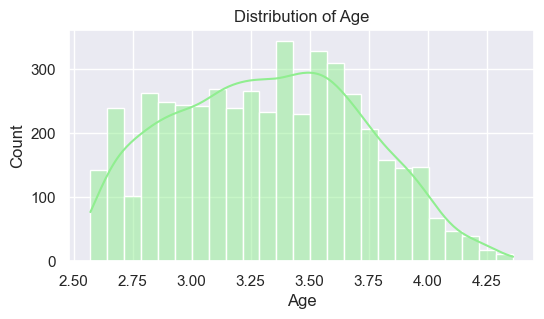

In [113]:
# Visualizing the distribution of the columns after removing skewness
column = 'Age'
plt.figure(figsize=(6, 3))
sns.histplot(data=df_process, x=column, kde=True, color='lightgreen')
plt.title(f"Distribution of {column}")

plt.show()


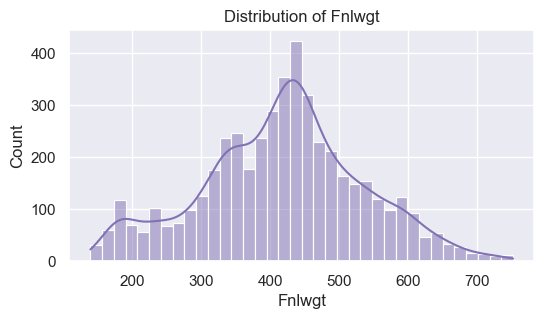

In [114]:
# Visualizing the distribution of the columns after removing skewness
column = 'Fnlwgt'
plt.figure(figsize=(6, 3))
sns.histplot(data=df_process, x=column, kde=True, color='m')
plt.title(f"Distribution of {column}")

plt.show()


### Feature Scaling using Standard Scalarization


#### Separating features and label


In [115]:
# Separating the independent and target variables into x and y 
x = df_process.drop('Income', axis=1)
y = df_process['Income']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")


Feature Dimension = (4813, 14)
Label Dimension = (4813,)


### Scaling


In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Capital_gain_bin,Capital_loss_bin
0,0.906780,1.717833,-1.100630,-1.173223,1.222903,-0.413459,-0.681722,-0.925736,0.386291,0.708981,-2.333932,0.223174,-0.232496,-0.072453
1,0.097205,-0.081303,0.401862,0.126667,-0.423368,-1.719649,-0.192001,-0.305443,0.386291,0.708981,0.005274,0.223174,-0.232496,-0.072453
2,1.088411,-0.081303,0.573734,-0.739926,-1.246504,-0.413459,-0.192001,-0.925736,-2.283080,0.708981,0.005274,0.223174,-0.232496,-0.072453
3,0.022411,-0.081303,0.992506,0.559964,1.634471,-0.413459,-0.681722,2.175731,0.386291,-1.410475,0.005274,0.223174,-0.232496,-0.072453
4,0.844625,-0.081303,-0.146530,-0.739926,-2.069640,0.239635,0.297719,-0.305443,-2.283080,-1.410475,-2.074020,-5.042195,-0.232496,-0.072453


We have scaled the data using the Standard Scalarization method to overcome the issue of biases.



###  Muticollinearity Analysis and Feature Selection


#### Checking Variance Inflation Factor (VIF)


In [117]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)


,Features,VIF values
7,Relationship,1.639240
9,Sex,1.509780
0,Age,1.202817
5,Marital_status,1.149256
10,Hours_per_week,1.137848
4,Education_num,1.081266
8,Race,1.057669
11,Native_country,1.051339
12,Capital_gain_bin,1.050907
3,Education,1.025751


As we can see after the standardization there is no multicollinearit issue (No value is greater than 10). Infinite values correspond to categorical features. We can continue with model building.



Now we are going to balance the dataset and then move ahead from model building.



###  Balancing the Dataset


As we see previously in the Section 1.4.1.1. The dataset is imbalance: 24697 (75.9%) records for "<=50K" and only 7839 (24.1%) records as ">50K". So, we are going to apply SMOTE for oversampling the data.



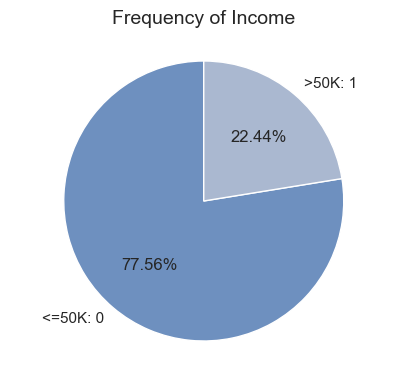

In [118]:
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
sns.set_palette('vlag')
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


After processing the data, the dataset is still imbalanced: 77.54% for an income <=50K and 22.46% for an income >50K.



In [119]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)


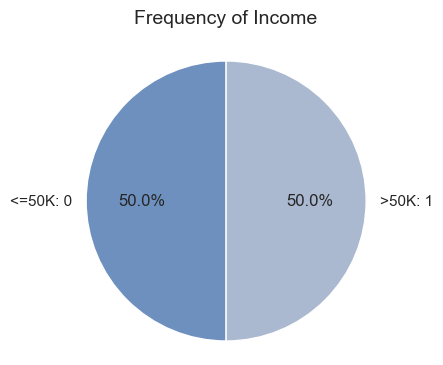

In [120]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.1f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [121]:
X = x1
Y = y1


Since the data is balanced, we can build machine learning classification models.



### Modeling


#### Finding the best random state


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [123]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")


Best accuracy is 0.9138 at random_state 194
CPU times: total: 3min 51s
Wall time: 3min 55s


Best accuracy is 91.38% at random_state 194



### Creating train test split


In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)


x_train shape:  (5226, 14)
x_test shape:   (2240, 14)
y_train shape:  (5226,)
y_test shape:   (2240,)


###  Classification Algorithms¶


In [125]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [126]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]


In [127]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}


### RandomForestClassifier


In [128]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred



Model: RandomForestClassifier
Confusion matrix: 
 [[1001  126]
 [  72 1041]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1127
           1       0.89      0.94      0.91      1113

    accuracy                           0.91      2240
   macro avg       0.91      0.91      0.91      2240
weighted avg       0.91      0.91      0.91      2240

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 91.16%
CPU times: total: 1.45 s
Wall time: 1.53 s


### Extra Trees Classifier


In [129]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred



Model: ExtraTreesClassifier
Confusion matrix: 
 [[1010  117]
 [  65 1048]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      1127
           1       0.90      0.94      0.92      1113

    accuracy                           0.92      2240
   macro avg       0.92      0.92      0.92      2240
weighted avg       0.92      0.92      0.92      2240

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 91.88%
CPU times: total: 1.09 s
Wall time: 1.2 s


### Logistic Regression


In [130]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred



Model: LogisticRegression
Confusion matrix: 
 [[820 307]
 [250 863]]
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      1127
           1       0.74      0.78      0.76      1113

    accuracy                           0.75      2240
   macro avg       0.75      0.75      0.75      2240
weighted avg       0.75      0.75      0.75      2240

Training Accuracy using LogisticRegression is 76.06%
The accuracy score using LogisticRegression is 75.13%
CPU times: total: 344 ms
Wall time: 392 ms


###  Support Vector Machine Classifier


In [131]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred



Model: SVC
Confusion matrix: 
 [[ 890  237]
 [  79 1034]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      1127
           1       0.81      0.93      0.87      1113

    accuracy                           0.86      2240
   macro avg       0.87      0.86      0.86      2240
weighted avg       0.87      0.86      0.86      2240

Training Accuracy using SVC is 86.62%
The accuracy score using SVC is 85.89%
CPU times: total: 4.28 s
Wall time: 4.6 s


###  Gradient Boosting Classifier


In [132]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred



Model: GradientBoostingClassifier
Confusion matrix: 
 [[ 950  177]
 [  83 1030]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      1127
           1       0.85      0.93      0.89      1113

    accuracy                           0.88      2240
   macro avg       0.89      0.88      0.88      2240
weighted avg       0.89      0.88      0.88      2240

Training Accuracy using GradientBoostingClassifier is 89.02%
The accuracy score using GradientBoostingClassifier is 88.39%
CPU times: total: 1.55 s
Wall time: 1.75 s


###  AdaBoost Classifier


In [133]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred



Model: AdaBoostClassifier
Confusion matrix: 
 [[ 940  187]
 [ 108 1005]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1127
           1       0.84      0.90      0.87      1113

    accuracy                           0.87      2240
   macro avg       0.87      0.87      0.87      2240
weighted avg       0.87      0.87      0.87      2240

Training Accuracy using AdaBoostClassifier is 86.18%
The accuracy score using AdaBoostClassifier is 86.83%
CPU times: total: 453 ms
Wall time: 619 ms


###  Bagging Classifier


In [134]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred



Model: BaggingClassifier
Confusion matrix: 
 [[986 141]
 [128 985]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1127
           1       0.87      0.88      0.88      1113

    accuracy                           0.88      2240
   macro avg       0.88      0.88      0.88      2240
weighted avg       0.88      0.88      0.88      2240

Training Accuracy using BaggingClassifier is 99.39%
The accuracy score using BaggingClassifier is 87.99%
CPU times: total: 391 ms
Wall time: 489 ms


## Comparing models


###  Comparing accuracy of each model


In [135]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)


,id,Model,Training Accuracy,Model Accuracy Score
1,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1273185238),...",1.000000,0.918750
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.911607
4,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.890165,0.883929
6,BaggingClassifier,(DecisionTreeClassifier(random_state=55489618)...,0.993877,0.879911
5,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.861845,0.868304
3,SVC,SVC(),0.866246,0.858929
2,LogisticRegression,LogisticRegression(),0.760620,0.751339


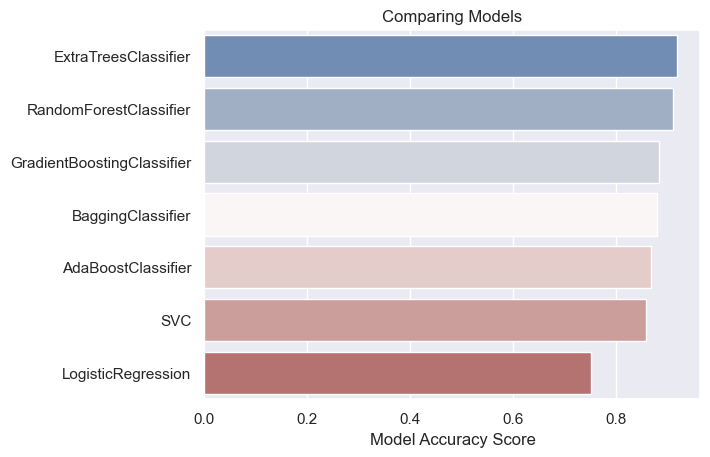

In [136]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='vlag')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');


The model with the best accuracy is ExtraTreesClassifier with 90.85% of accuracy.



### Cross validation score


In order to evaluate the performance of the models we are going to user Cross-validation technique.



In [137]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]


In [138]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)


In [139]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff



::: Model: RandomForestClassifier::: 
score:[0.83601071 0.88680509 0.93503014 0.93101139 0.93302076]
Score mean: 0.9044
Difference between Accuracy score and cross validation score is 0.0072

::: Model: ExtraTreesClassifier::: 
score:[0.87416332 0.89618218 0.93971869 0.93034159 0.93703952]
Score mean: 0.9155
Difference between Accuracy score and cross validation score is 0.0033

::: Model: LogisticRegression::: 
score:[0.75435074 0.74012056 0.75686537 0.76490288 0.7722706 ]
Score mean: 0.7577
Difference between Accuracy score and cross validation score is -0.0064

::: Model: SVC::: 
score:[0.83199465 0.83791025 0.87006028 0.86738111 0.85599464]
Score mean: 0.8527
Difference between Accuracy score and cross validation score is 0.0063

::: Model: GradientBoostingClassifier::: 
score:[0.80990629 0.85331547 0.90154052 0.89618218 0.89082384]
Score mean: 0.8704
Difference between Accuracy score and cross validation score is 0.0136

::: Model: AdaBoostClassifier::: 
score:[0.80455154 0.84125

In [140]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])


,Model,Training Accuracy,Model Accuracy Score,CV score mean,Diff Acc and cv score
id,,,,,
ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1273185238),...",1.000000,0.918750,0.915489,0.003261
RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.911607,0.904376,0.007232
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.890165,0.883929,0.870354,0.013575
BaggingClassifier,(DecisionTreeClassifier(random_state=55489618)...,0.993877,0.879911,0.886831,-0.006921
AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.861845,0.868304,0.858030,0.010273
SVC,SVC(),0.866246,0.858929,0.852668,0.006260
LogisticRegression,LogisticRegression(),0.760620,0.751339,0.757702,-0.006363


After applying cross-validation technique we observe the better cross-validation score is for ExtraTreesClassifier and the difference with accuracy score is -0.002618 confirming as follows:



#### ExtraTreesClassifier is our best Model



### Hyper Parameter Tuning


#### Finding the best parameters for ExtraTreesClassifier


In [141]:
random_state


194

In [142]:
model = ExtraTreesClassifier()
model.get_params()


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [143]:
# ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
             'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
             'min_samples_leaf': np.arange(1, 5),  # Vary the minimum samples required for a leaf
             'n_estimators': np.arange(50, 310, 10),  # Vary the number of trees
             'max_depth': [None] + list(np.arange(20, 110, 10)),  # Vary the maximum depth of trees
             'max_features': ['auto', 'sqrt', 'log2'],
             'random_state': [random_state, 50, 500, 1000],
             'n_jobs': [-1, -1, 1]
             }


In [144]:
# Build the model 
model = ExtraTreesClassifier()


In [145]:
%%time 

# Perform search with cross validation
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   random_state=random_state, n_jobs=-1)
# Fit the model 
random_search.fit(x_train, y_train)


CPU times: total: 2.38 s
Wall time: 42.5 s


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]),
                                        'n_jobs': [-1, -1, 1],
                                        'random_state': [194, 50, 500, 1000]},
                   random_state=194, scoring='accuracy')

In [146]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
display(best_params)


Best Parameters for ExtraTreesClassifier model:


{'random_state': 500,
 'n_jobs': 1,
 'n_estimators': 290,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'gini',
 'bootstrap': False}

These are the best parameters for training the model.



In [147]:
best_model


ExtraTreesClassifier(max_depth=30, min_samples_split=4, n_estimators=290,
                     n_jobs=1, random_state=500)

### Final Model


In [148]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'gini',
                                   bootstrap = False,
                                   max_depth = 40,
                                   max_features = 'sqrt',
                                   min_samples_split = 3,
                                   min_samples_leaf = 1,
                                   n_estimators = 300,
                                   n_jobs = -1, 
                                   random_state = 1000)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")


accuracy_score: 91.79%


The accuracy for the final model is 91.21%. For better accuracy_score we set random_state to 1000 instead of 500.



###  Plotting ROC and compare AUC for all the models used


In [149]:
models


{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}